## Install Required Libraries in Colab



In [1]:
!pip install quandl
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import quandl
import pandas_datareader as pdr

import pandas as pd
import yfinance as yf
import numpy as np

from datetime import date

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import copy
from tqdm import tqdm

## Collecting Data from FRED Website

In [135]:
# Macro economic indicators (mostly US) from the FRED database
# Detailed info on each indicator check on web: https://fred.stlouisfed.org/series/
# DOC with the metrics and external exploratory Colab: https://docs.google.com/document/d/1Cf4C3Xz4_yitlzPaLEknHoDlw7KMXey4c49kZ7ucQEE/edit?usp=sharing

FRED_INDICATORS = ['GDP', 'GDPC1', 'GDPPOT', 'NYGDPMKTPCDWLD',         # 1. Growth
                   'CPIAUCSL', 'CPILFESL', 'GDPDEF',                   # 2. Prices and Inflation
                   'M1SL', 'WM1NS', 'WM2NS', 'M1V', 'M2V', 'WALCL',    # 3. Money Supply
                   'UNRATE', 'NROU', 'CIVPART', 'EMRATIO',             # 4. Employment
                   'UNEMPLOY', 'PAYEMS', 'MANEMP', 'ICSA', 'IC4WSA',   # 4. Employment
                   'CDSP', 'MDSP', 'FODSP', 'DSPIC96', 'PCE', 'PCEDG', # 5. Income and Expenditure
                   'PSAVERT', 'DSPI', 'RSXFS',                         # 5. Income and Expenditure
                   'GFDEBTN', 'GFDEGDQ188S',                           # 6. Gov-t debt
                   ]

# ETF indexes
ETF_INDICATORS = {'VDE.US','VHT.US'} 

# update period for each ind (Y=Yearly, Q=Quarterly, M=Monthly, W=Weekly, D=Daily)
INDICATORS_PERIODS = {'GDP': 'Q', 'GDPC1': 'Q', 'GDPPOT': 'Q', 'NYGDPMKTPCDWLD': 'Y',                 # 1. Growth
                      # 2. Prices and Inflation
                      'CPIAUCSL': 'M', 'CPILFESL': 'M', 'GDPDEF': 'Q',
                      # 3. Money Supply
                      'M1SL': 'M', 'WM1NS': 'W', 'WM2NS': 'W', 'M1V': 'Q', 'M2V': 'Q', 'WALCL': 'W',
                      # 4. Employment
                      'UNRATE': 'M', 'NROU': 'Q', 'CIVPART': 'M', 'EMRATIO': 'M',
                      # 4. Employment
                      'UNEMPLOY': 'M', 'PAYEMS': 'M', 'MANEMP': 'M', 'ICSA': 'W', 'IC4WSA': 'W',
                      # 5. Income and Expenditure
                      'CDSP': 'Q', 'MDSP': 'Q', 'FODSP': 'Q', 'DSPIC96': 'M', 'PCE': 'M', 'PCEDG': 'M',
                      # 5. Income and Expenditure
                      'PSAVERT': 'M', 'DSPI': 'M', 'RSXFS': 'M',
                      # 6. Gov-t debt
                      'GFDEBTN': 'Q', 'GFDEGDQ188S': 'Q',
                      # 7. ETF
                      'VDE.US': 'D', 'VHT.US': 'D'
                      }



In [136]:
# Taking 17 Years of Data From Today
# as VTE was first formed in 2005
curr_date = date.today()
start = date(year=curr_date.year-17, month=curr_date.month, day=curr_date.day)
macro_indicators = dict()
index_fred = tqdm(FRED_INDICATORS)

# Fetch the necessary indexes from FRED Database 
index_fred.set_description('Downloading indexes from FRED:')
for indicator in index_fred:
  # tq_fred.set_description(indicator)
  # macro_indicators[indicator] = pdr.DataReader(indicator, "fred", start=start, timeout=90)
  macro_indicators[indicator] = pdr.fred.FredReader(indicator, start=start, timeout=90).read()

In [116]:
for indicator in tqdm(ETF_INDICATORS):
  macro_indicators[indicator]= pdr.get_data_stooq(indicator, start, curr_date)

100%|██████████| 2/2 [00:03<00:00,  1.54s/it]


In [141]:
macro_indicators['NYGDPMKTPCDWLD']

NYGDPMKTPCDWLD
DATE                      
2007-01-01    5.834935e+13
2008-01-01    6.412060e+13
2009-01-01    6.080391e+13
2010-01-01    6.660560e+13
2011-01-01    7.385746e+13
2012-01-01    7.550039e+13
2013-01-01    7.760623e+13
2014-01-01    7.973264e+13
2015-01-01    7.518636e+13
2016-01-01    7.646936e+13
2017-01-01    8.140950e+13
2018-01-01    8.646696e+13
2019-01-01    8.765425e+13
2020-01-01    8.511634e+13
2021-01-01    9.652743e+13

In [117]:
# Reversing the indexes of ETF's to keep them in synch with other indexes
macro_indicators['VDE.US'] = macro_indicators['VDE.US'].reindex(index=macro_indicators['VDE.US'].index[::-1])
macro_indicators['VHT.US'] = macro_indicators['VHT.US'].reindex(index=macro_indicators['VHT.US'].index[::-1])

In [62]:
macro_indicators['VDE.US']

Open      High       Low     Close        Volume
Date                                                            
2006-04-04   56.2456   57.1070   55.9101   57.0799  3.630488e+04
2006-04-05   57.0740   57.8503   56.8373   57.7788  4.079127e+04
2006-04-06   58.1434   58.3347   57.5720   57.9065  6.476142e+04
2006-04-07   57.8871   57.8871   56.9166   57.0605  3.560870e+04
2006-04-10   57.9286   58.1065   57.6213   57.9152  9.195078e+04
...              ...       ...       ...       ...           ...
2023-03-28  109.6000  112.2300  109.6000  111.6500  3.588700e+05
2023-03-29  113.0600  113.3900  112.1800  113.2600  1.232145e+06
2023-03-30  114.1100  114.2800  112.9200  113.5600  6.665650e+05
2023-03-31  113.8500  114.5500  113.5400  114.2300  4.789790e+05
2023-04-03  119.3300  120.3500  118.6000  119.6800  6.447370e+05

[4278 rows x 5 columns]

In [94]:
df = macro_indicators['VDE.US']['Close']
df.index = pd.to_datetime(df.index)
# df = pd.DataFrame({'Date': macro_indicators['VDE.US']['Close'].index, 'VDE_Close': macro_indicators['VDE.US']['Close'].values})

## Decomposition of VDE and VHT index models

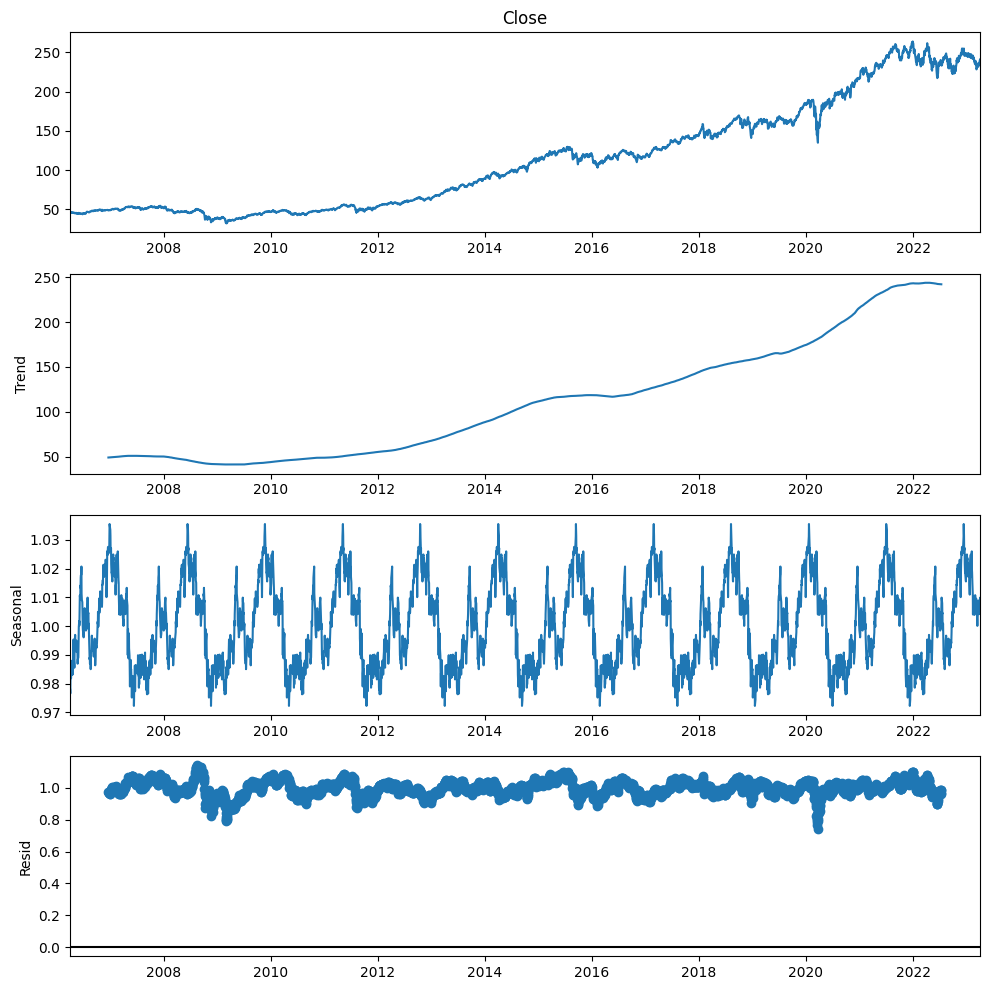

In [110]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose VDE Closing prices
seasonal_vde = seasonal_decompose(df, model="multiplicative",period = 365)
plt.rcParams["figure.figsize"] = (10,10)
seasonal_vde.plot()
plt.show()

# # Decompose VHT CLosing prices
# result_xle = seasonal_decompose(pd.DataFrame(macro_indicators['VHT.US']['Close']), model="multiplicative")

# # Decompose macroeconomic data
# results_macro = {}
# for col in df_macro.columns:
#     results_macro[col] = seasonal_decompose(df_macro[col], model="multiplicative")

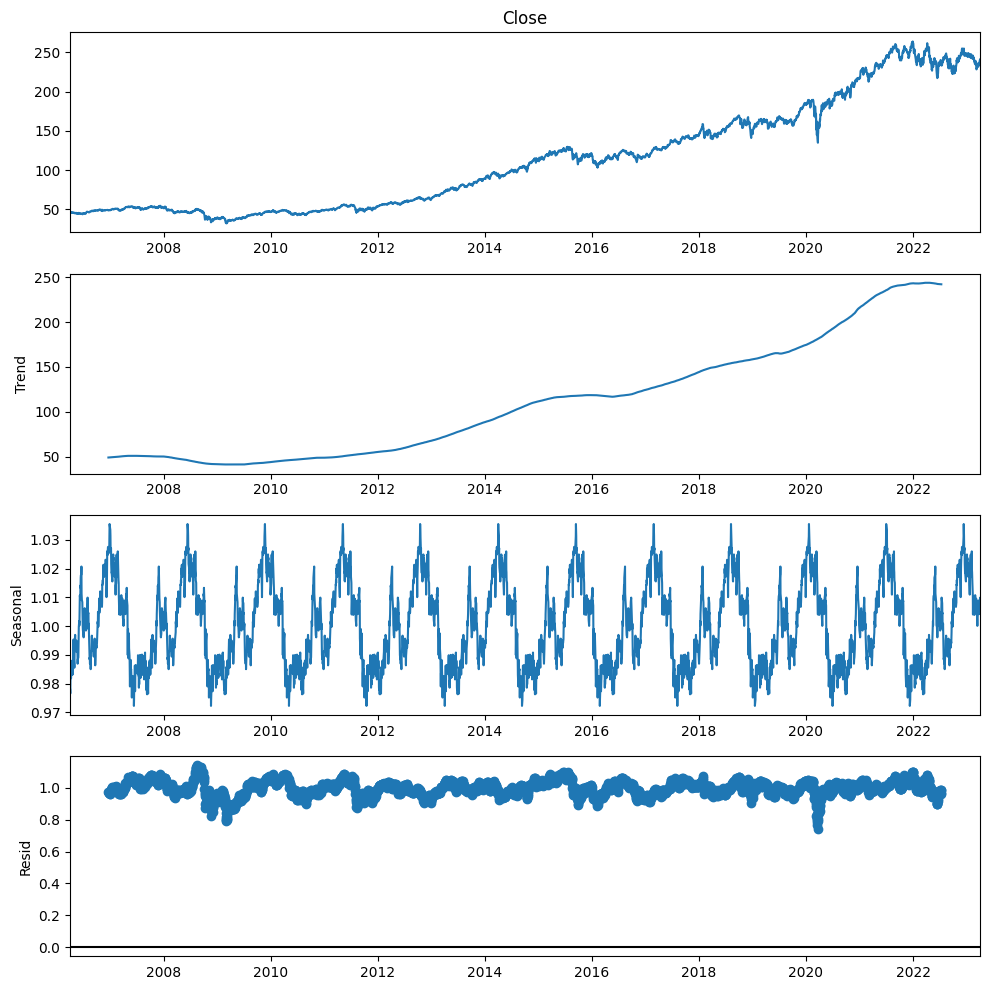

In [109]:
# Decompose VDE Closing prices
df = macro_indicators['VHT.US']['Close']
df.index = pd.to_datetime(df.index)
seasonal_vde = seasonal_decompose(df, model="multiplicative",period = 365)
plt.rcParams["figure.figsize"] = (10,10)
seasonal_vde.plot()
plt.show()

## Decomposition of MacroEconomic Indicators

GDP


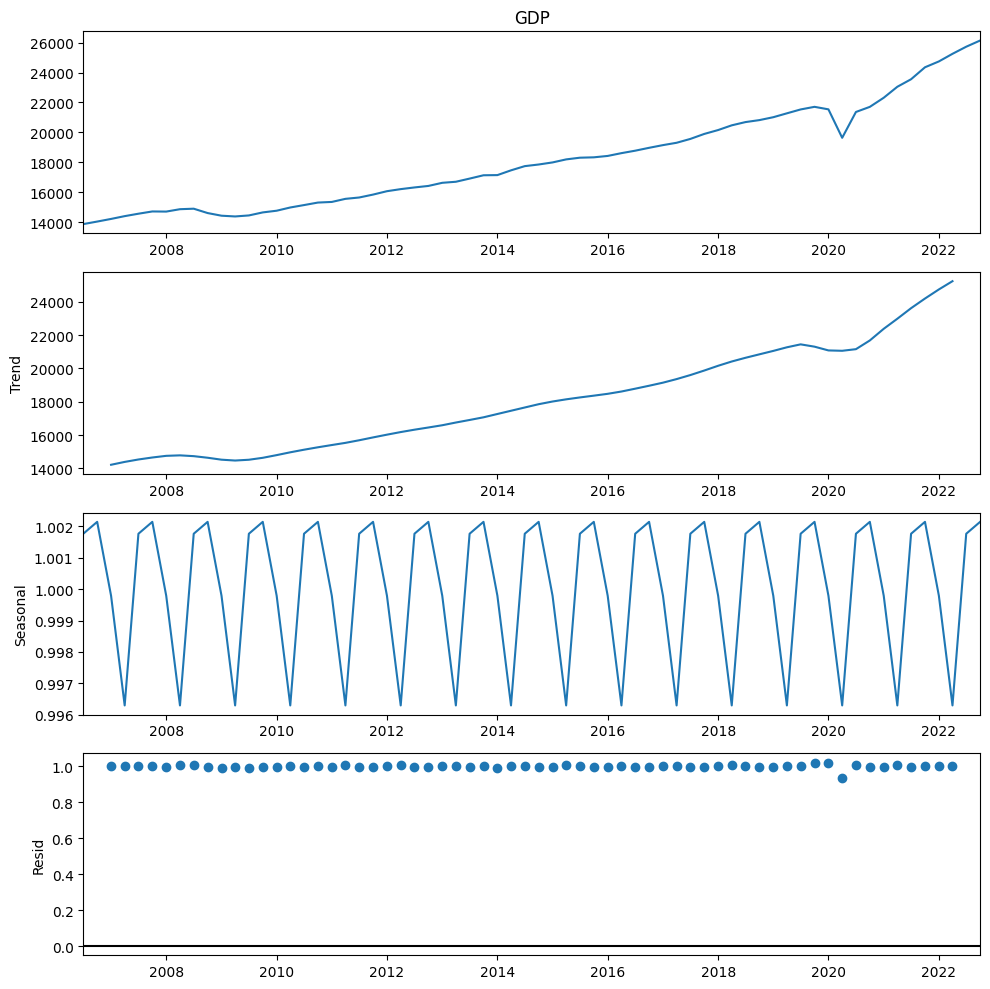

GDPC1


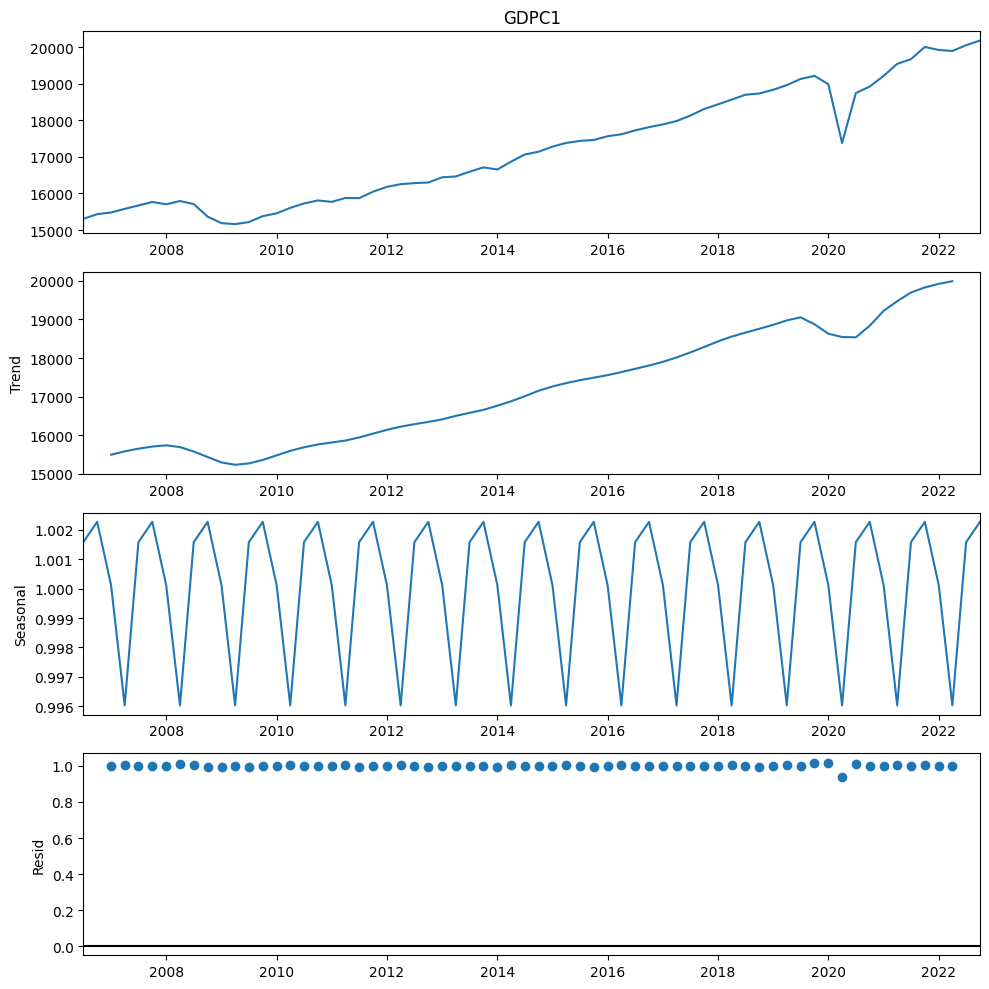

GDPPOT


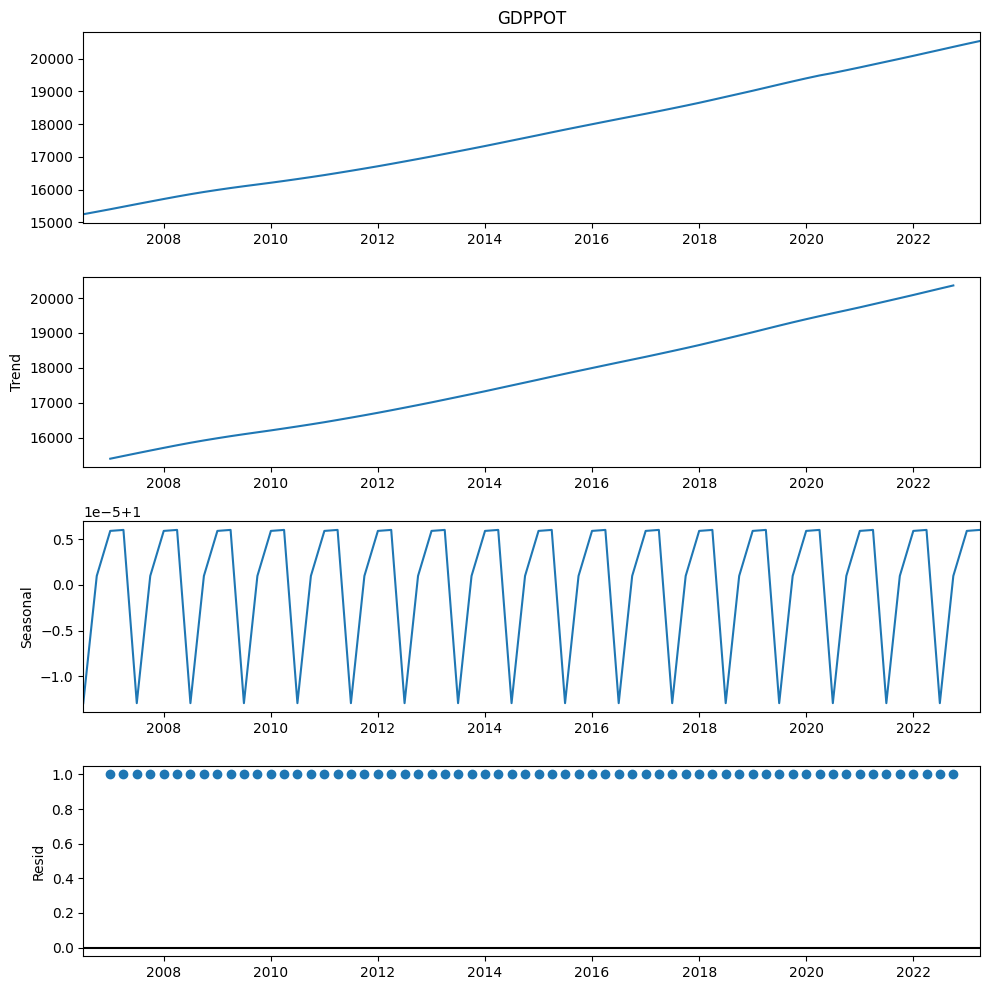

NYGDPMKTPCDWLD


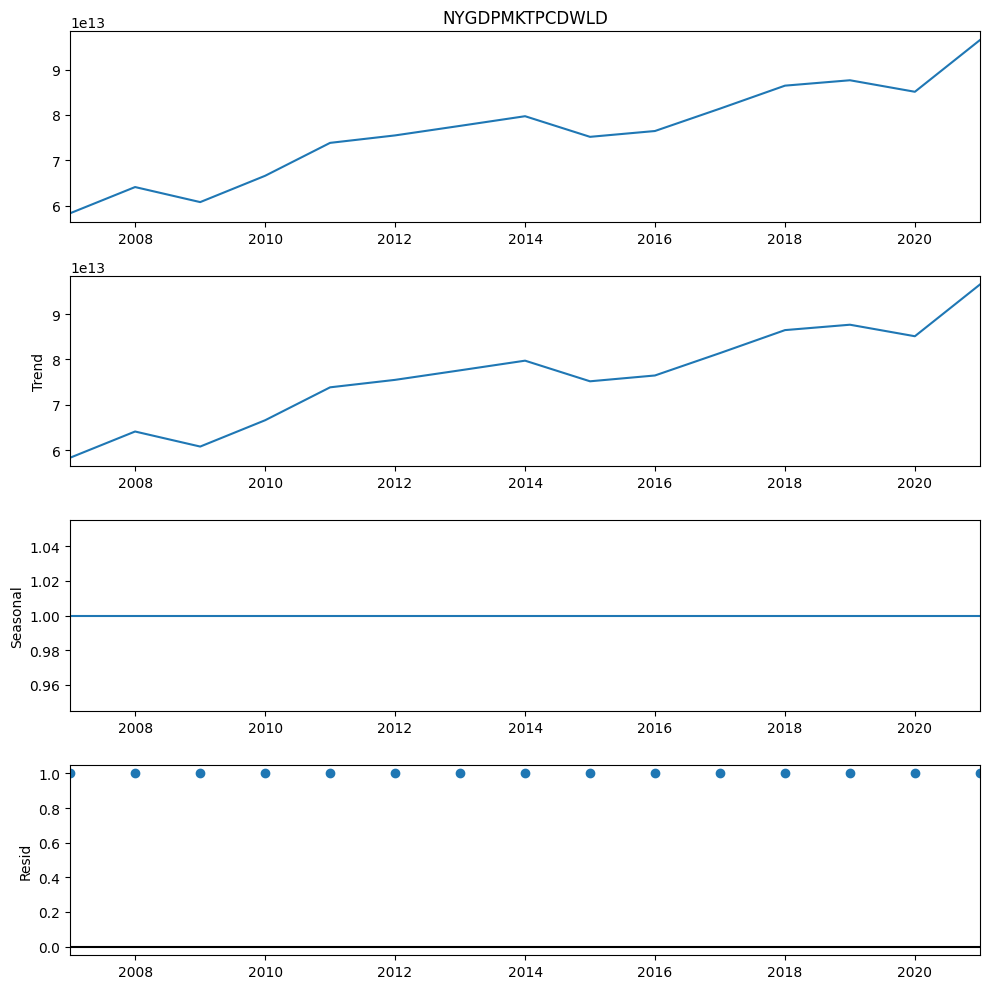

CPIAUCSL


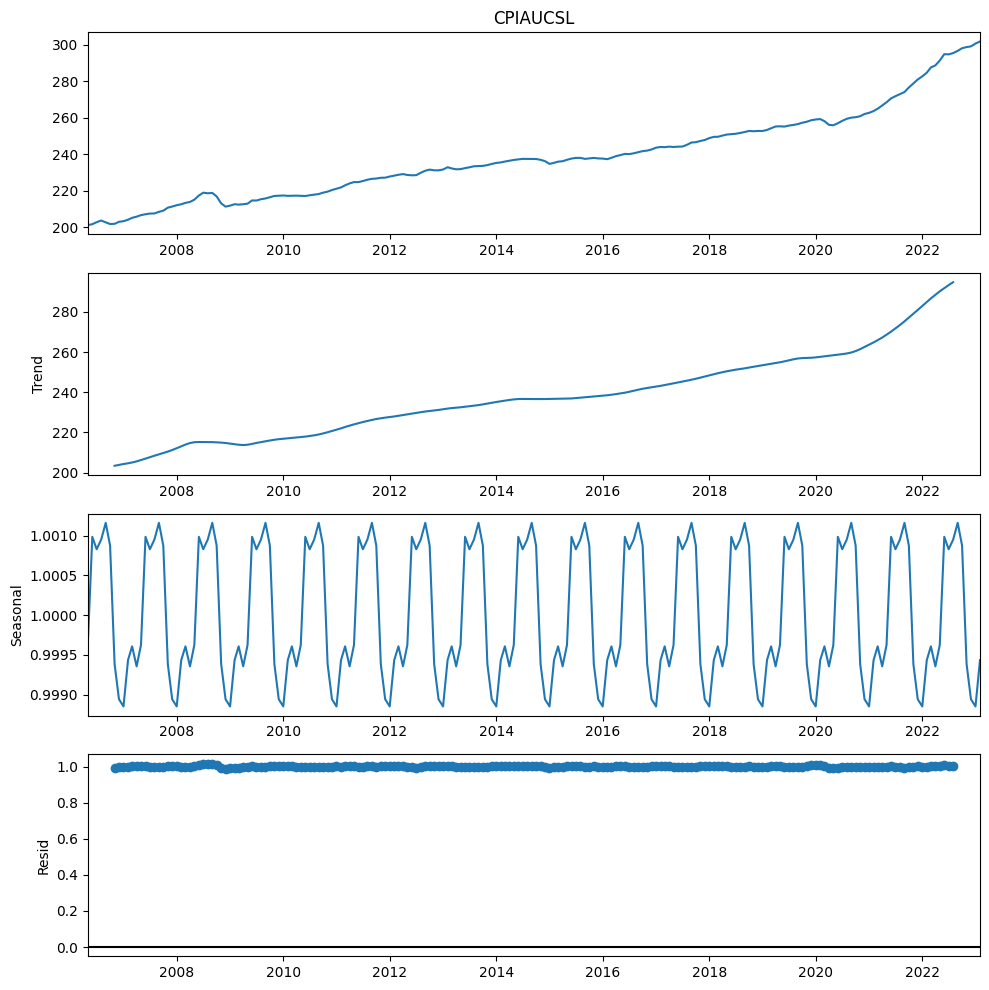

CPILFESL


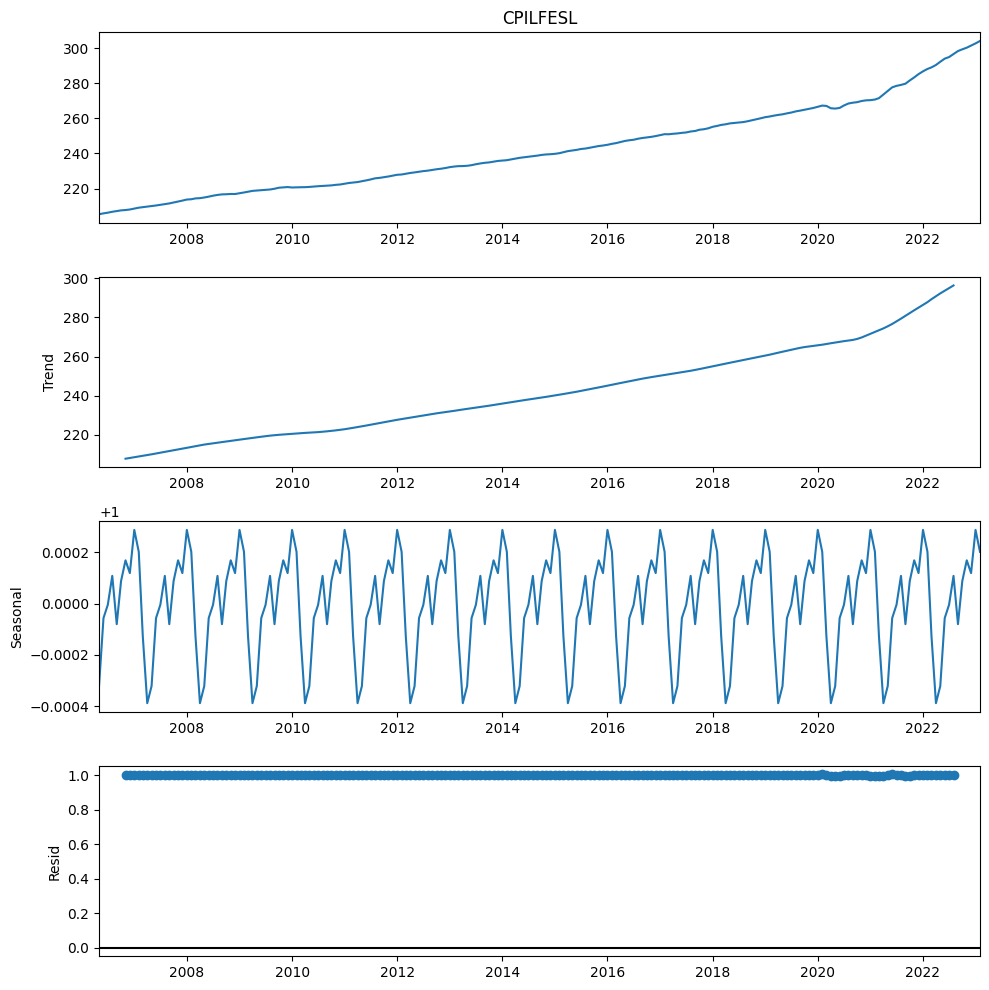

GDPDEF


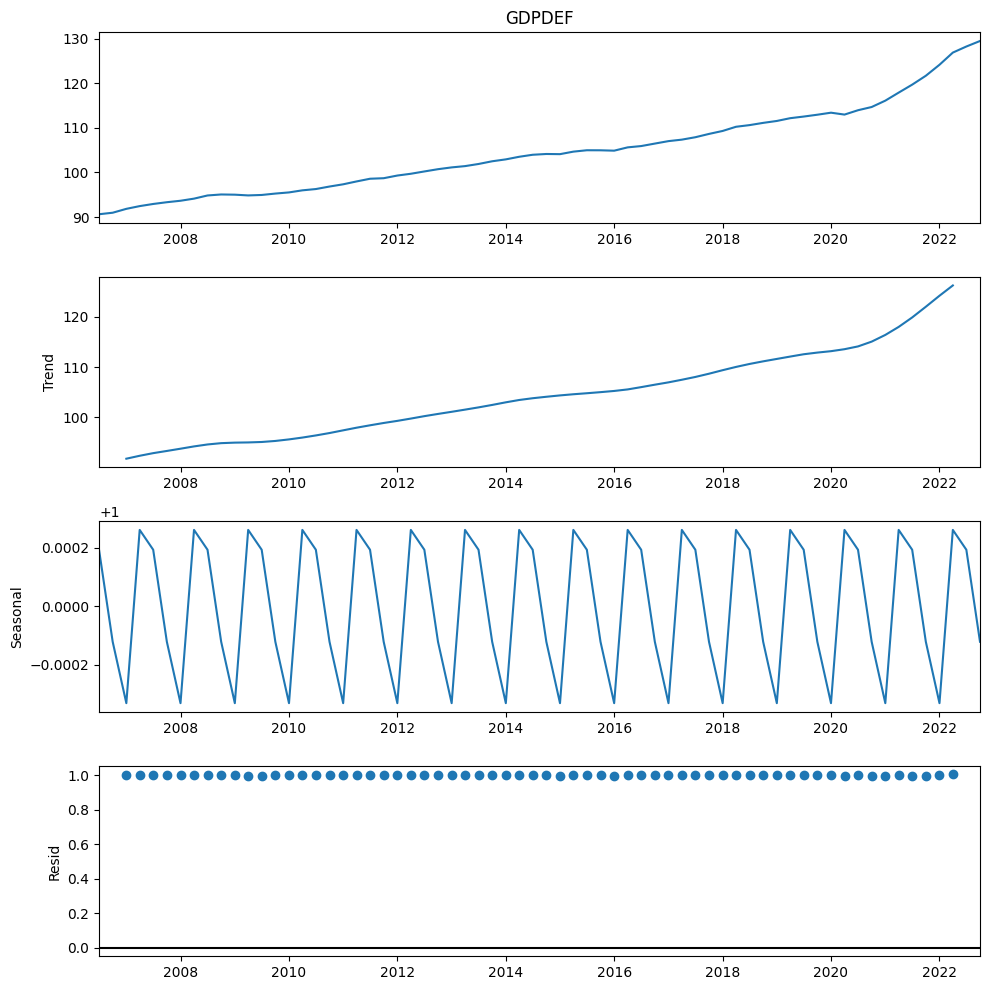

M1SL


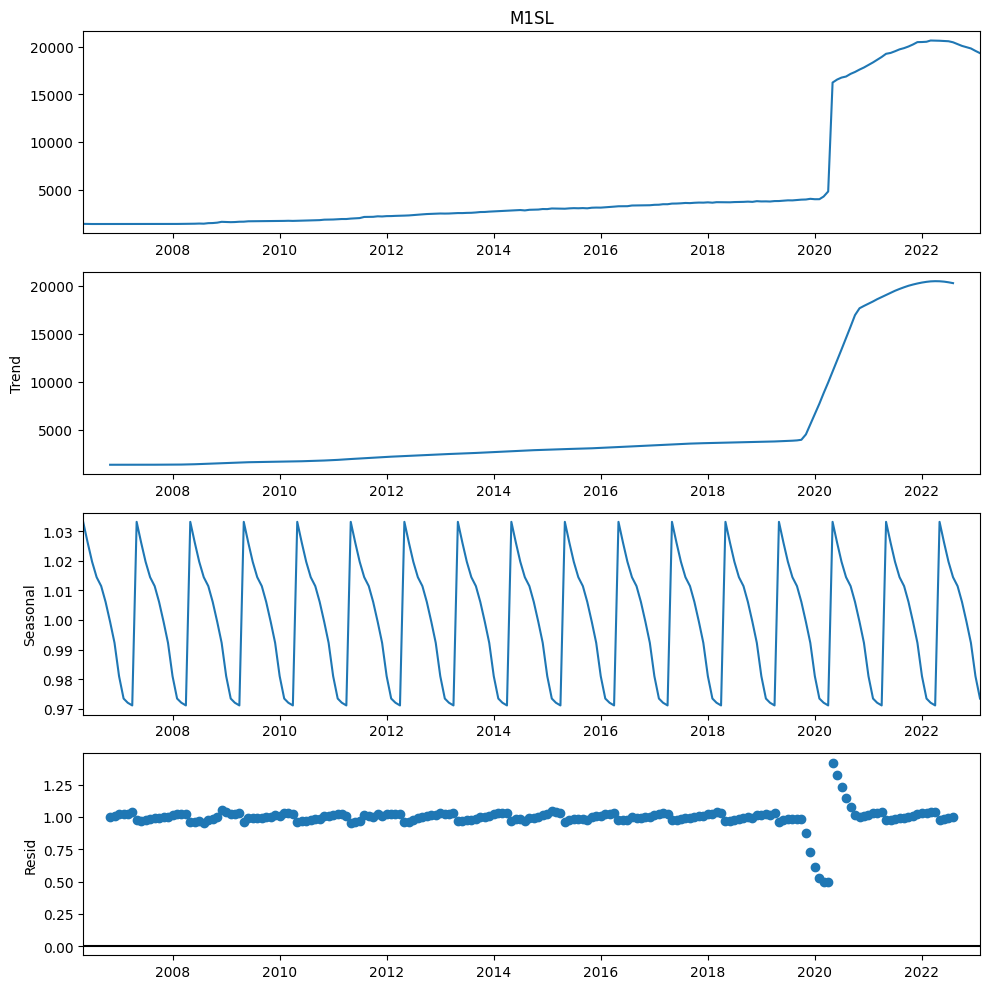

WM1NS


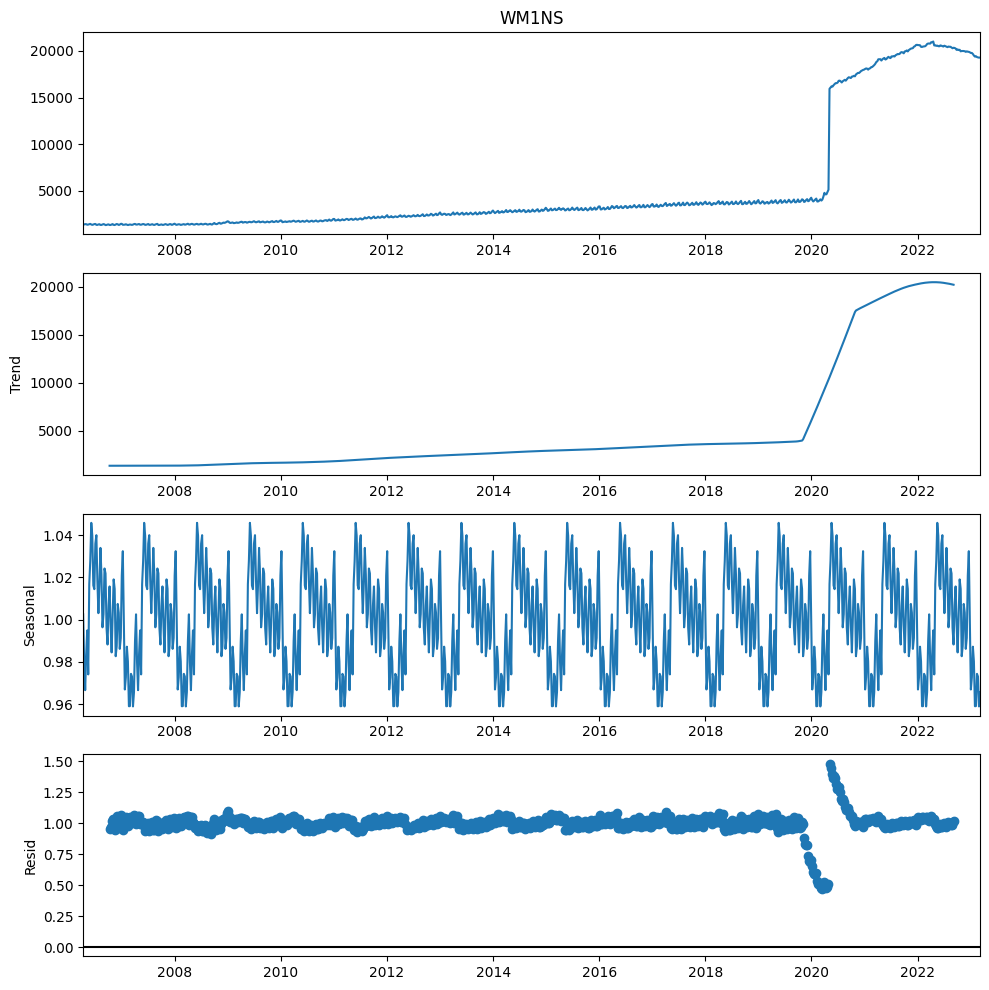

WM2NS


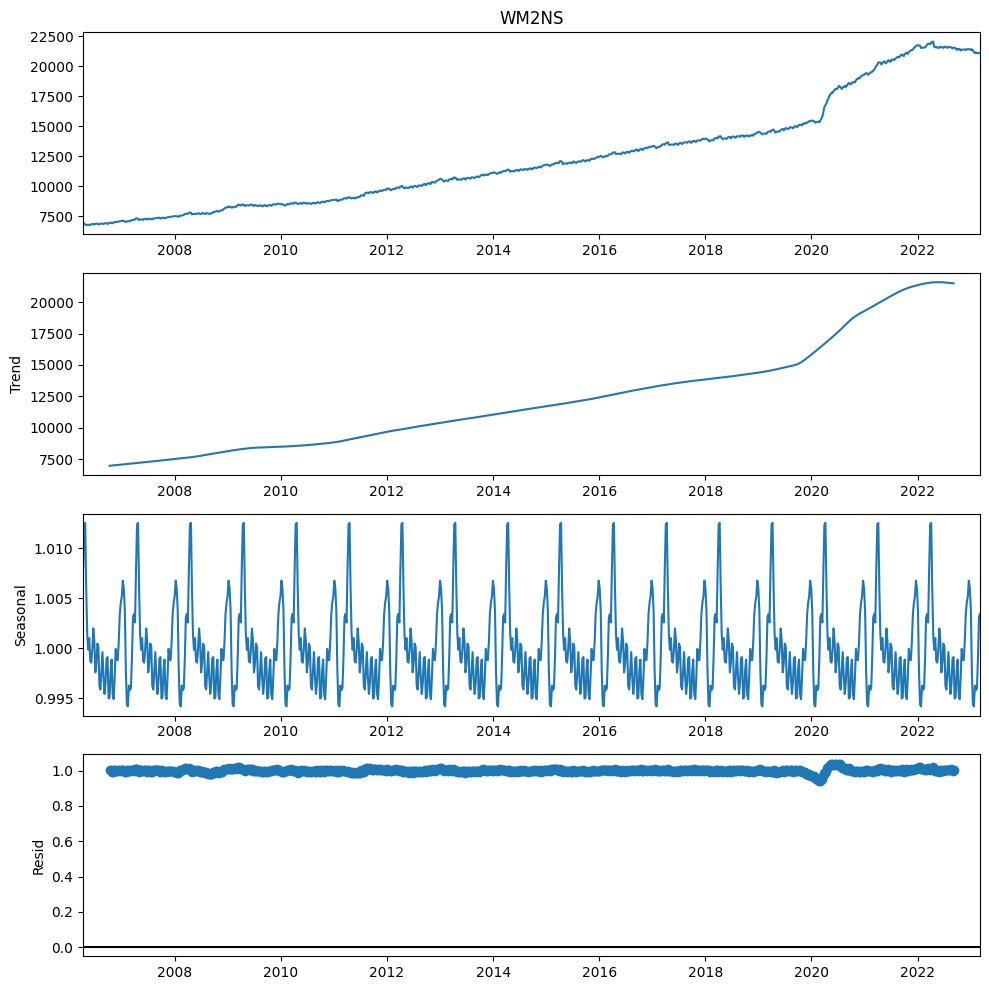

M1V


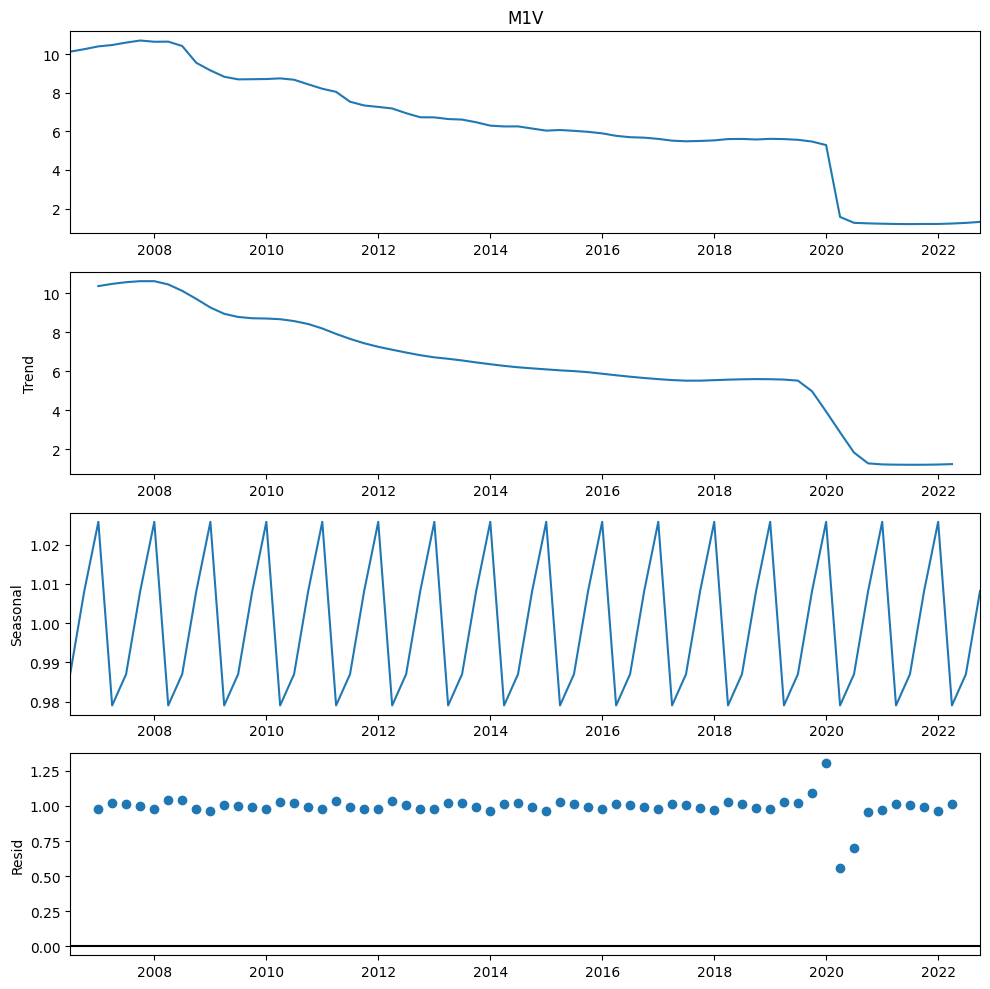

M2V


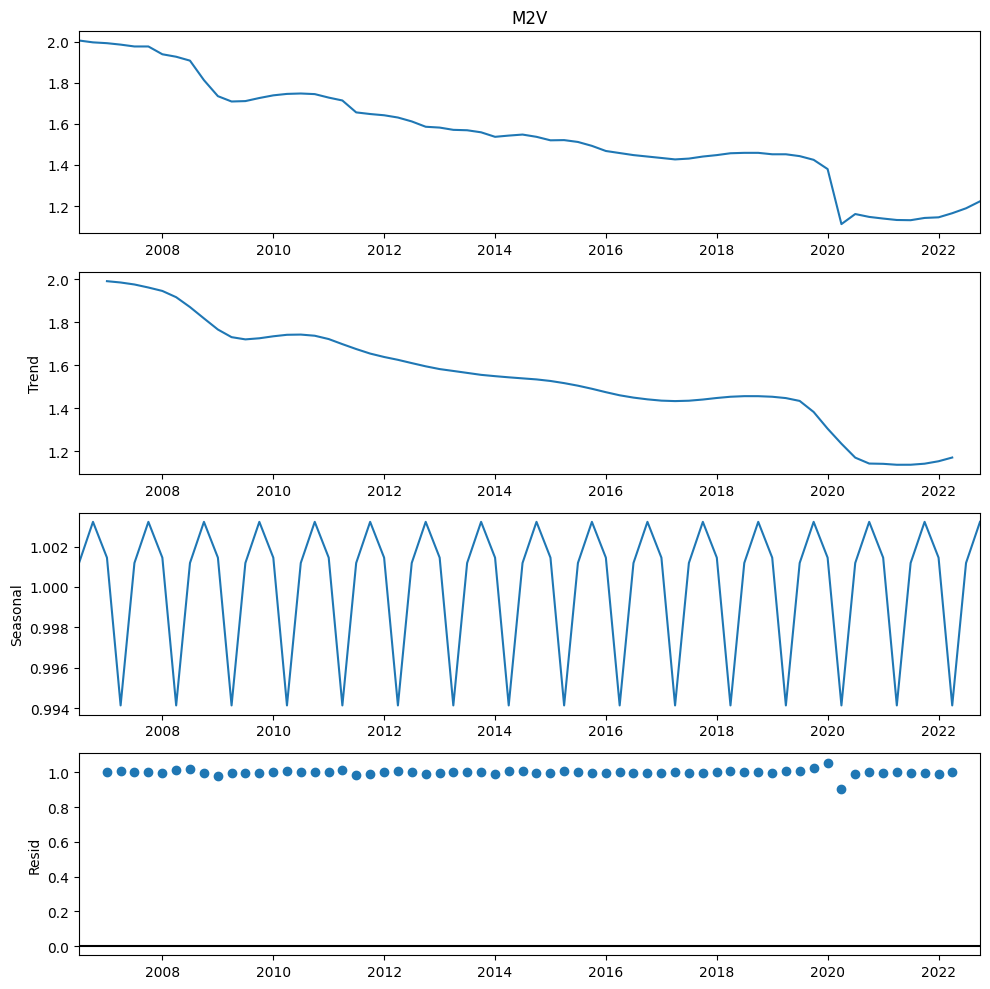

WALCL


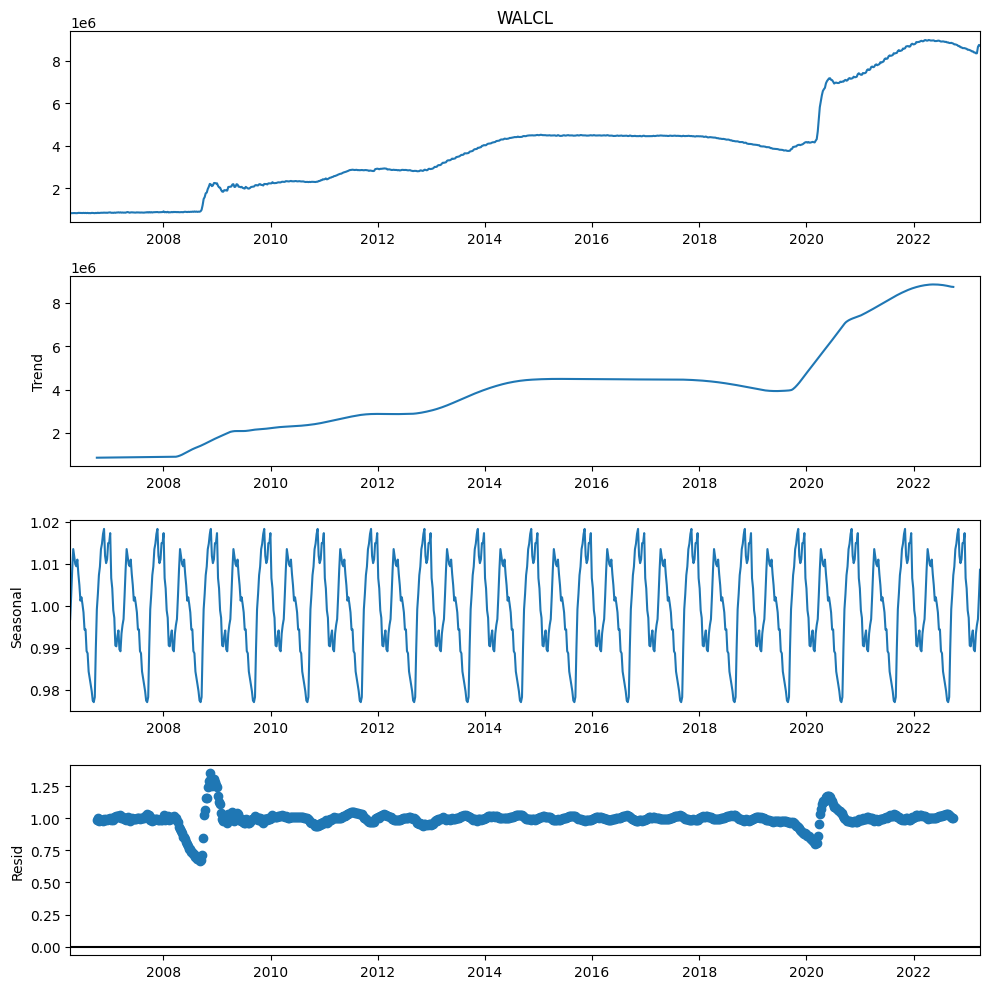

UNRATE


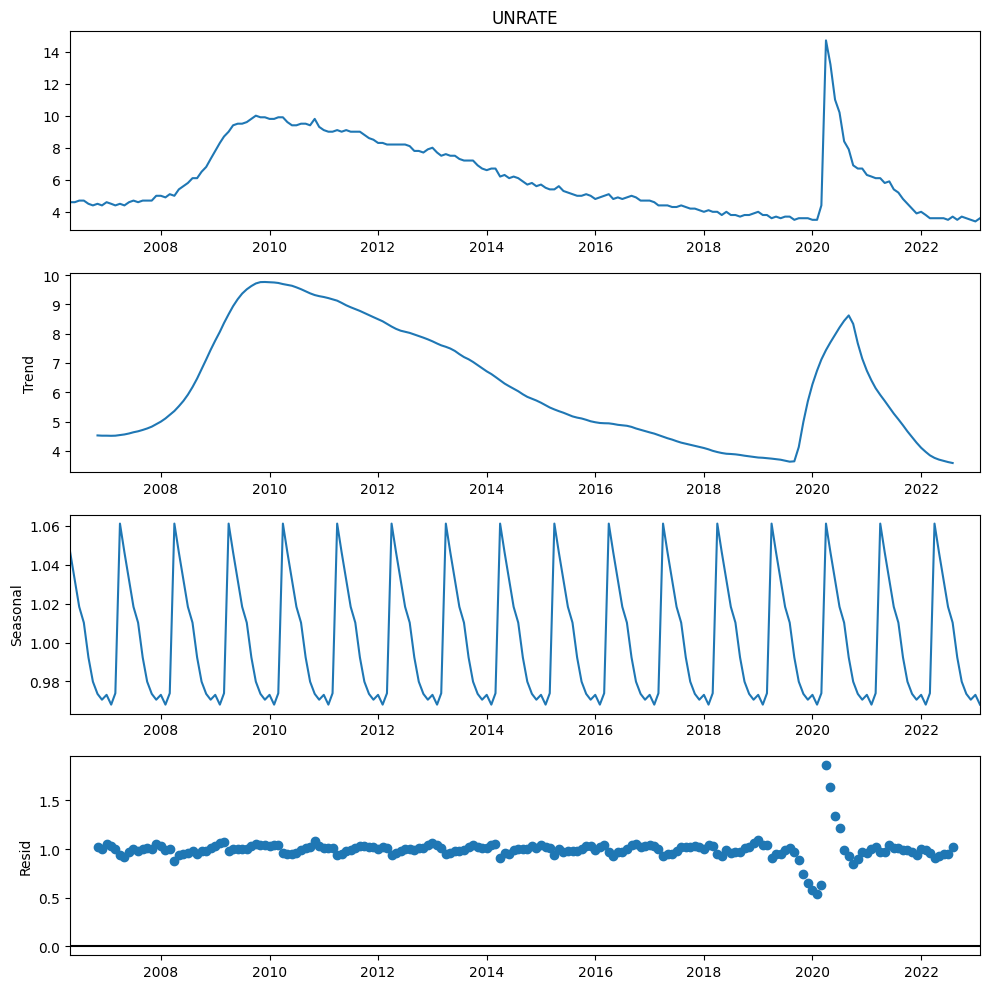

NROU


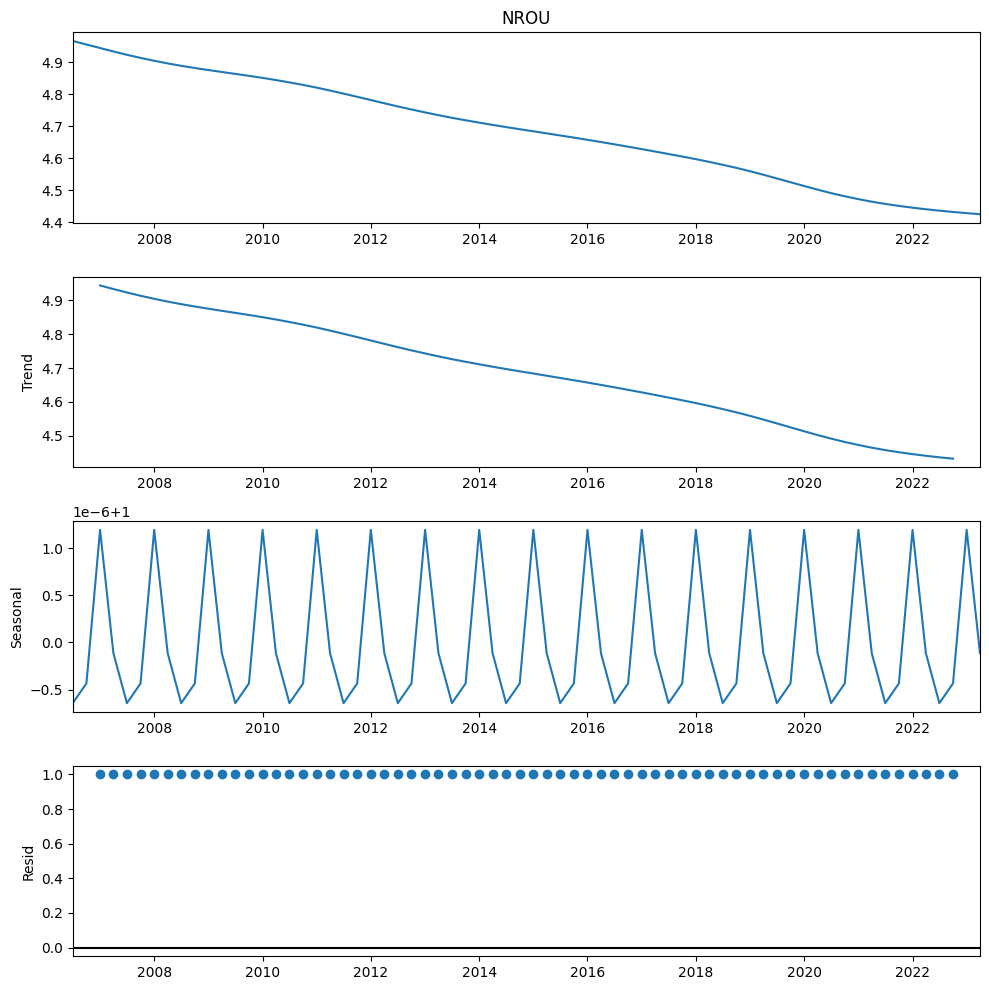

CIVPART


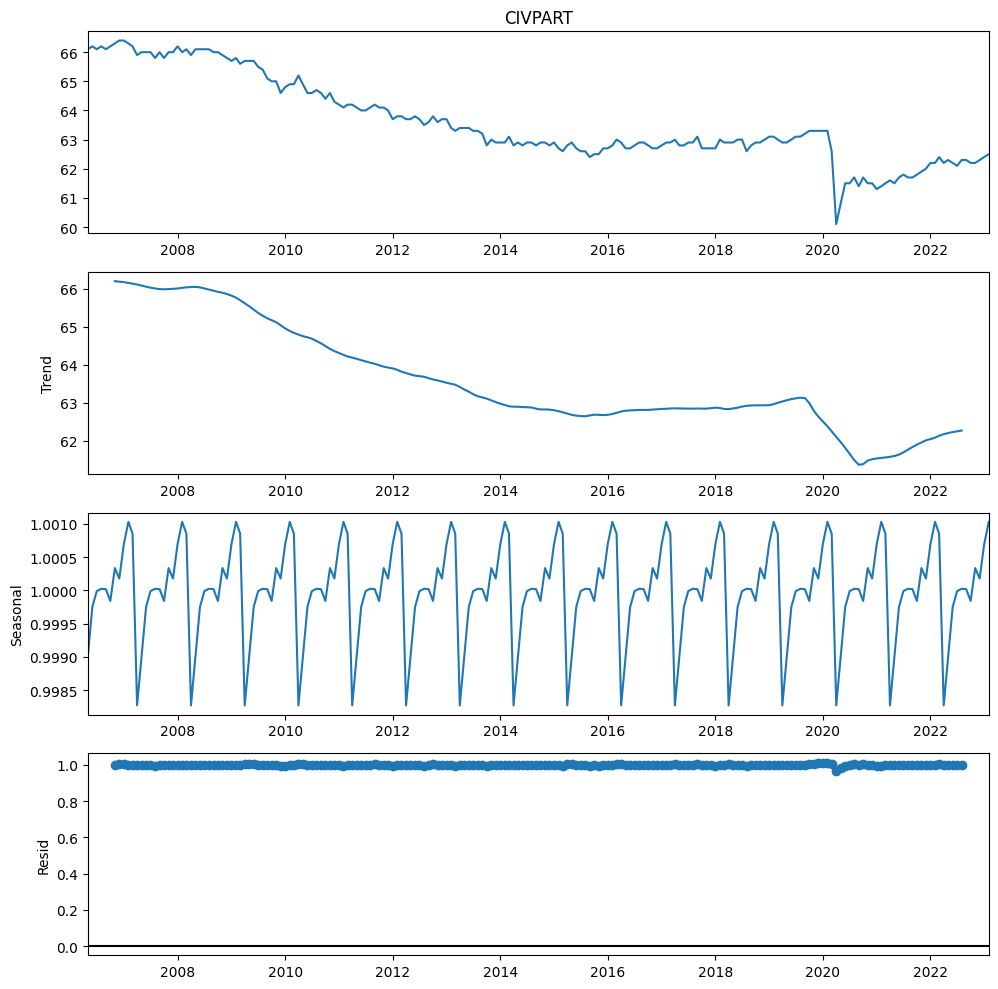

EMRATIO


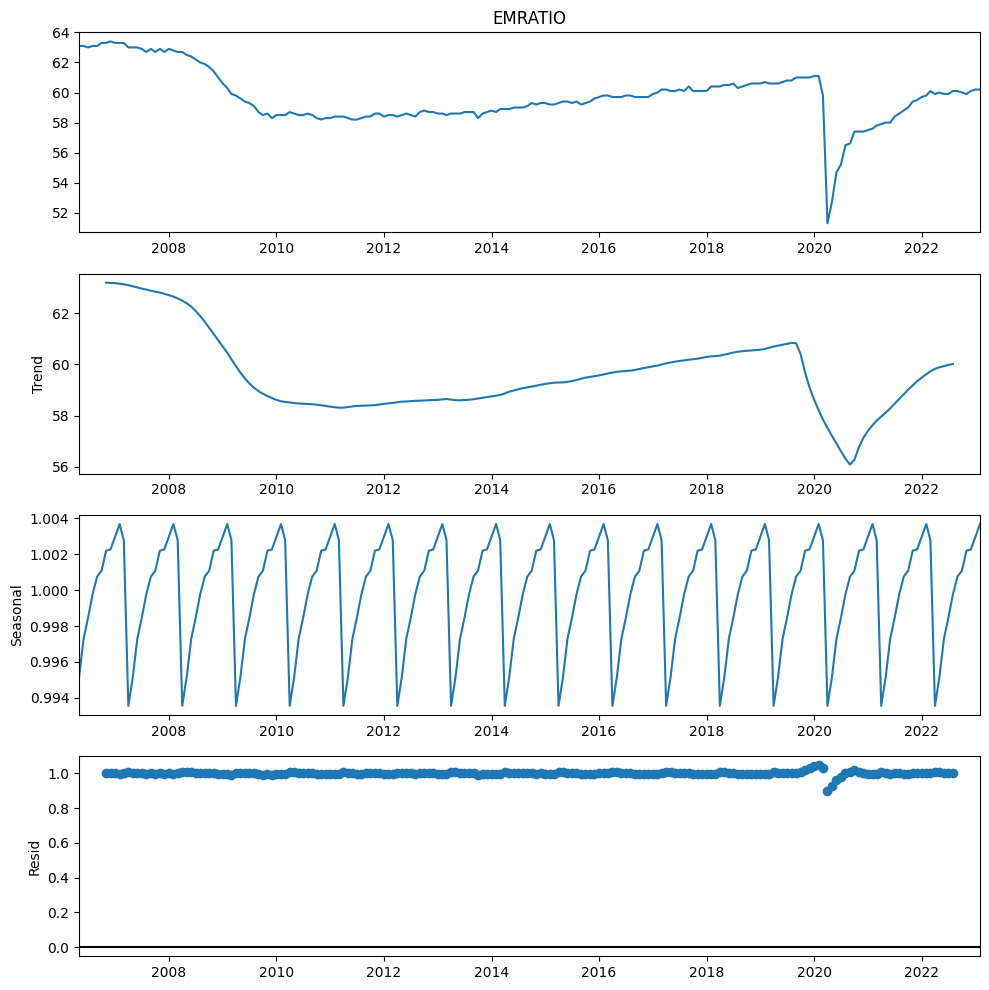

UNEMPLOY


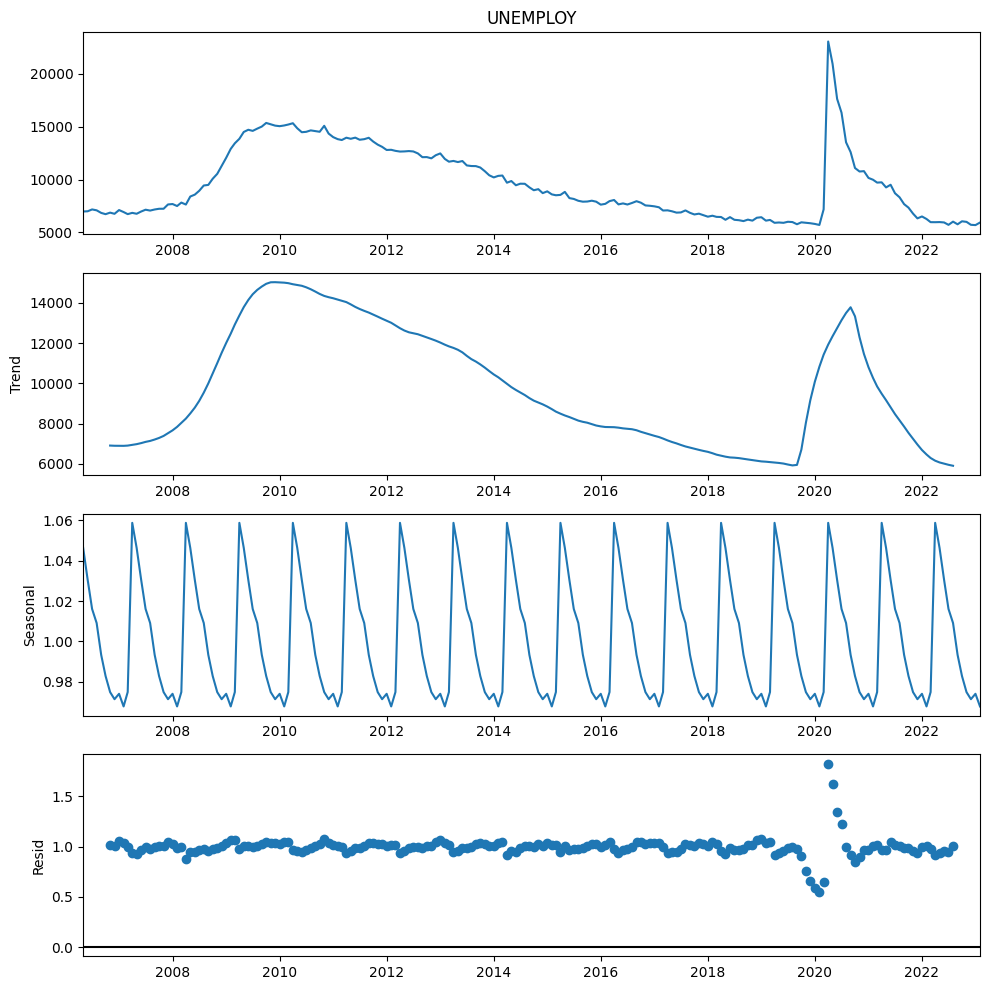

PAYEMS


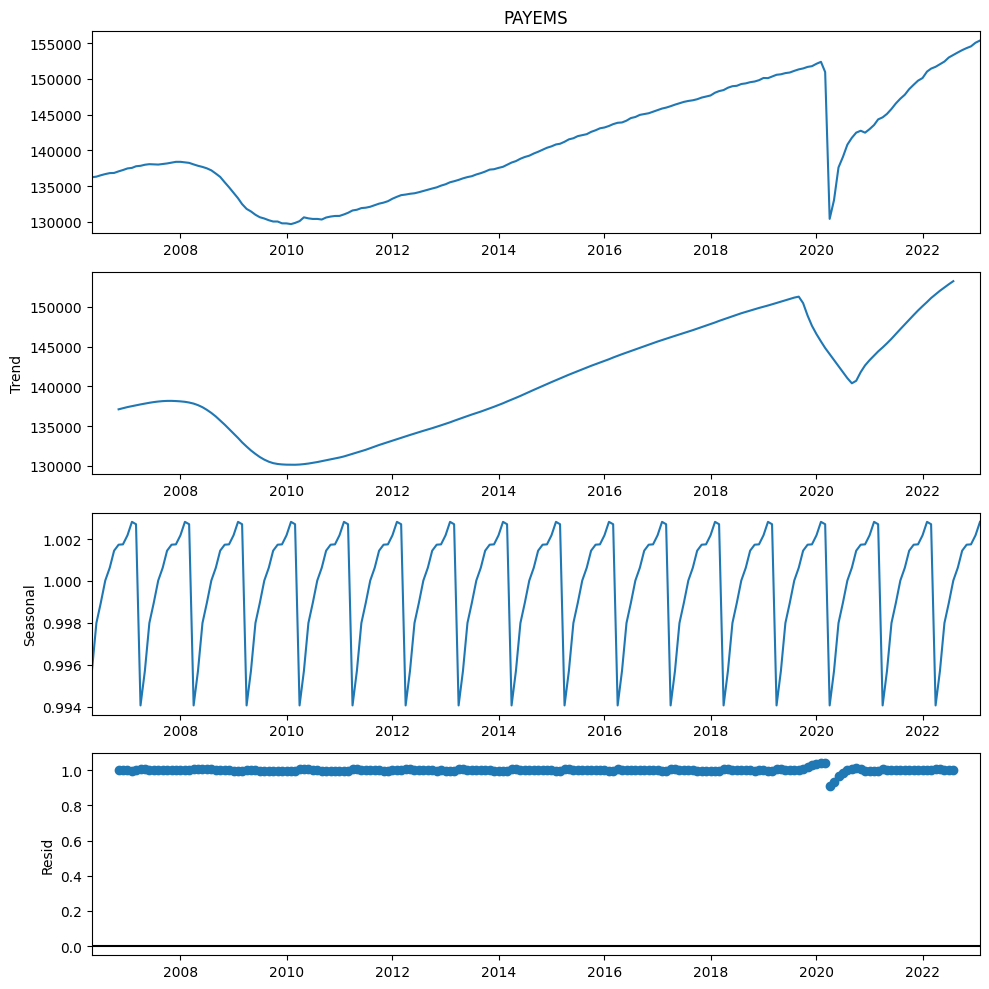

MANEMP


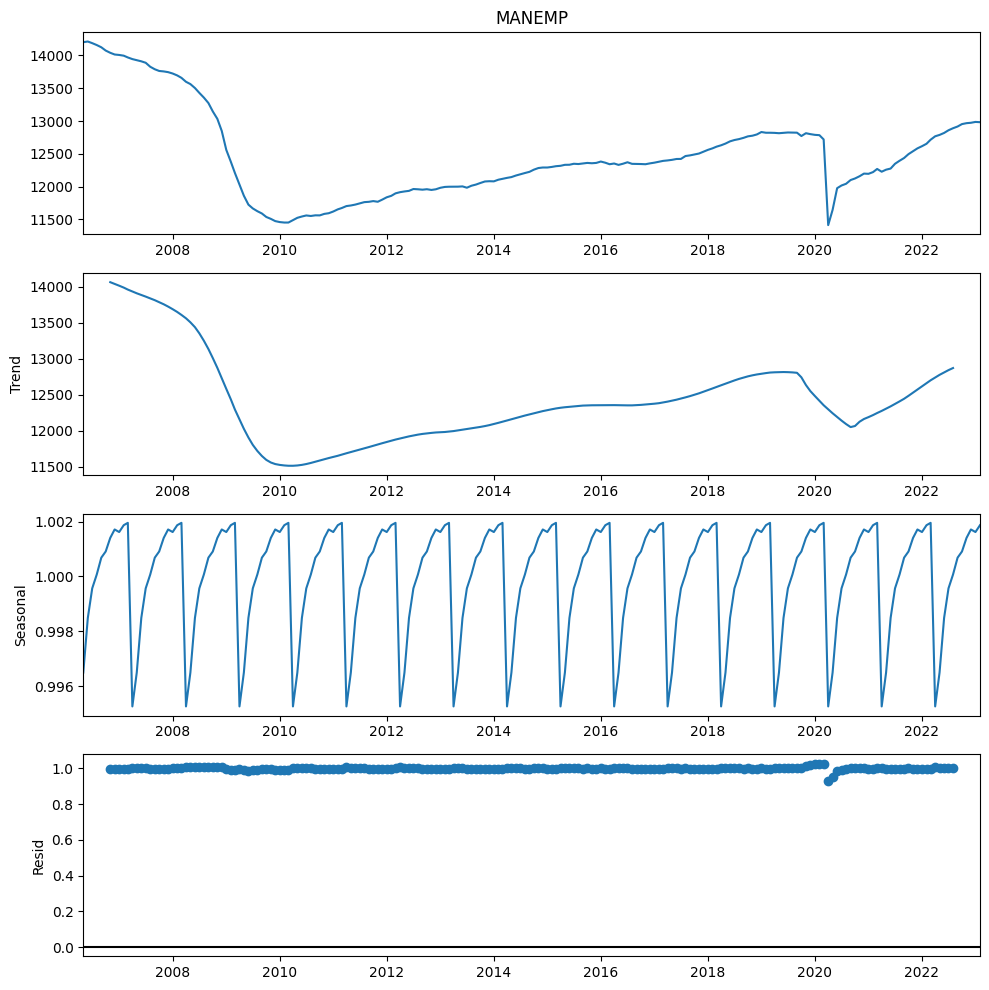

ICSA


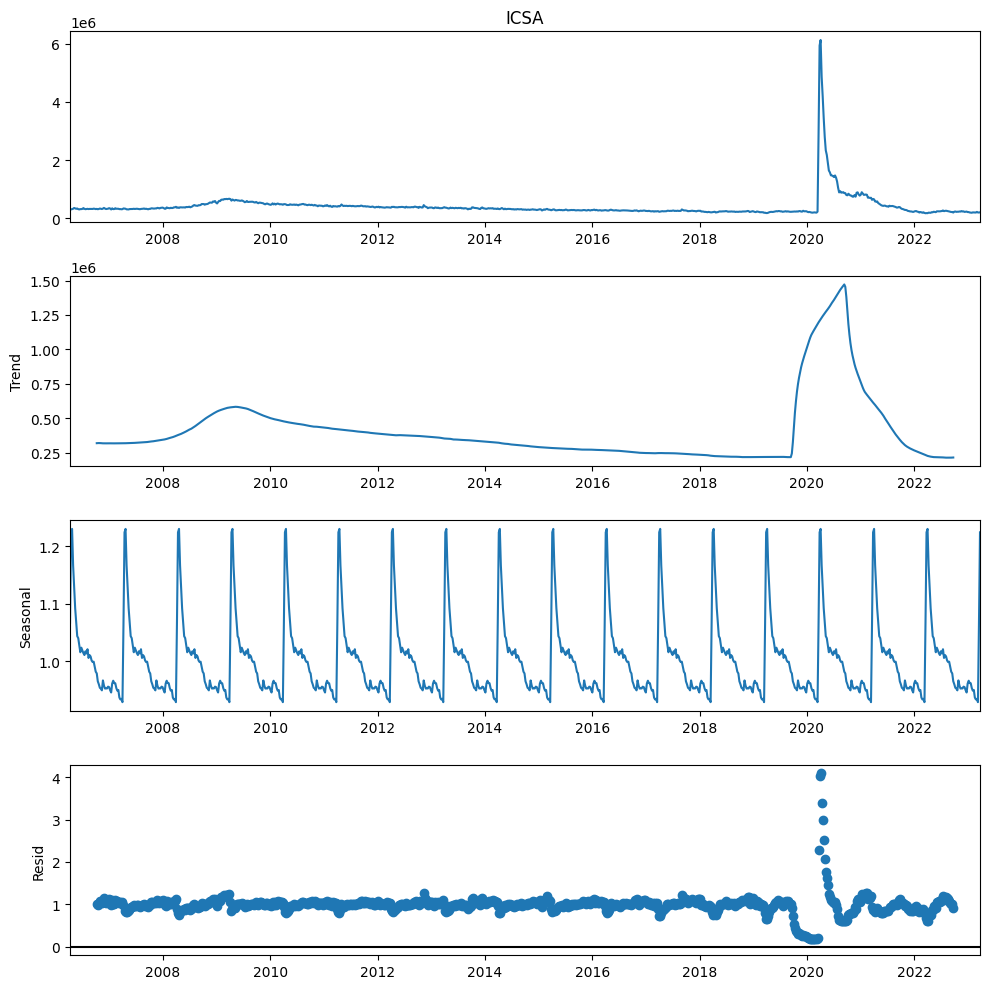

IC4WSA


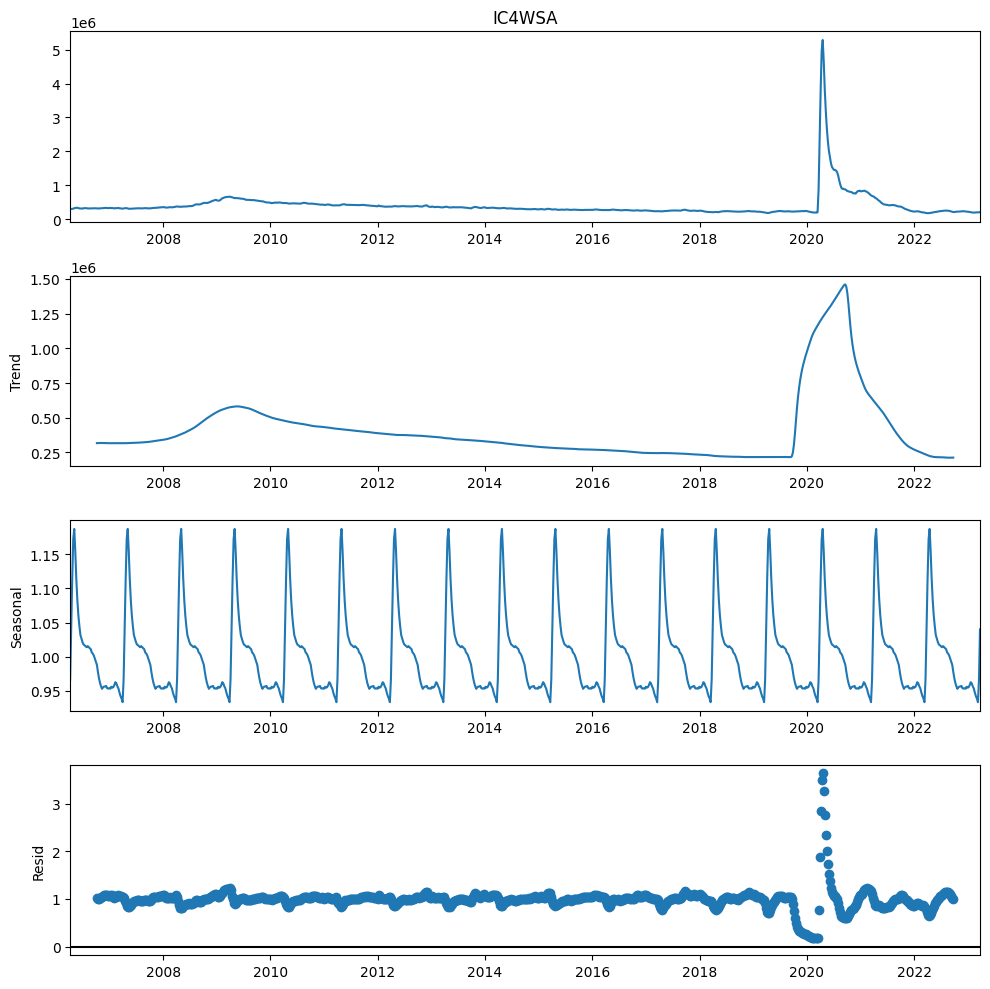

CDSP


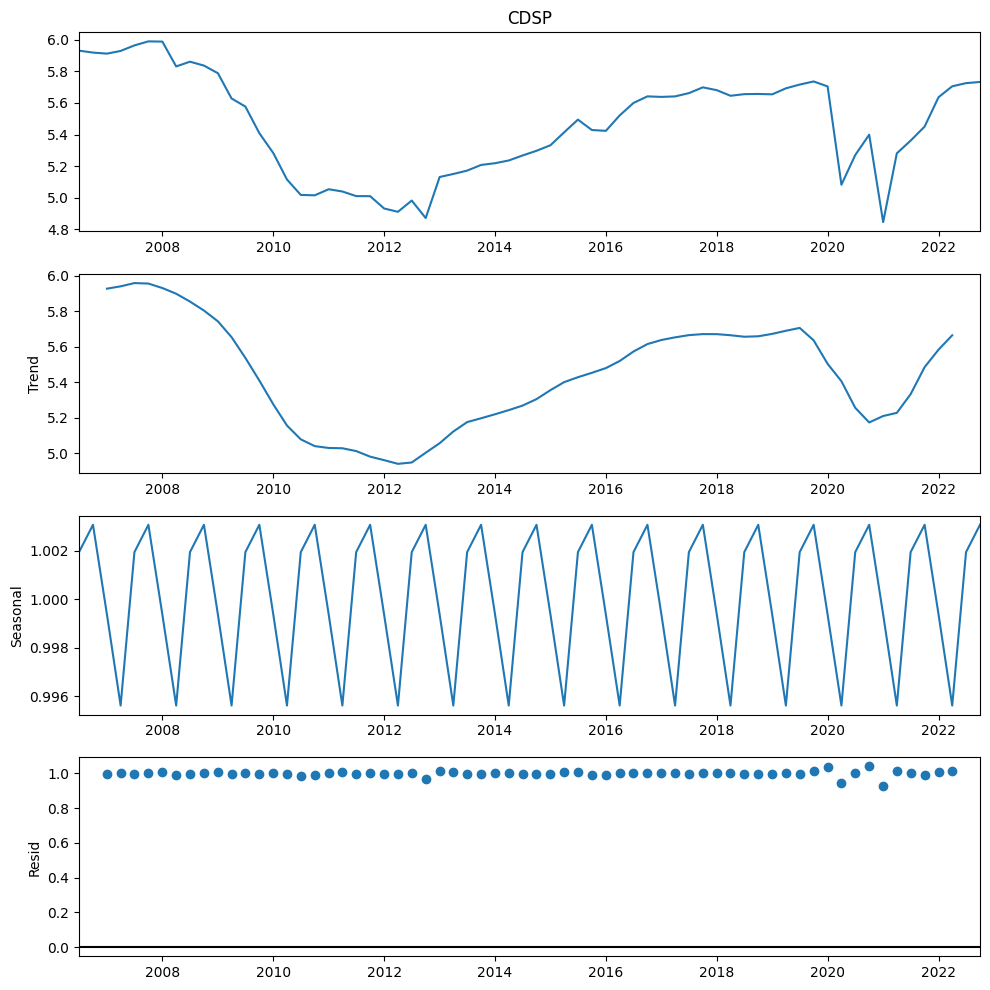

MDSP


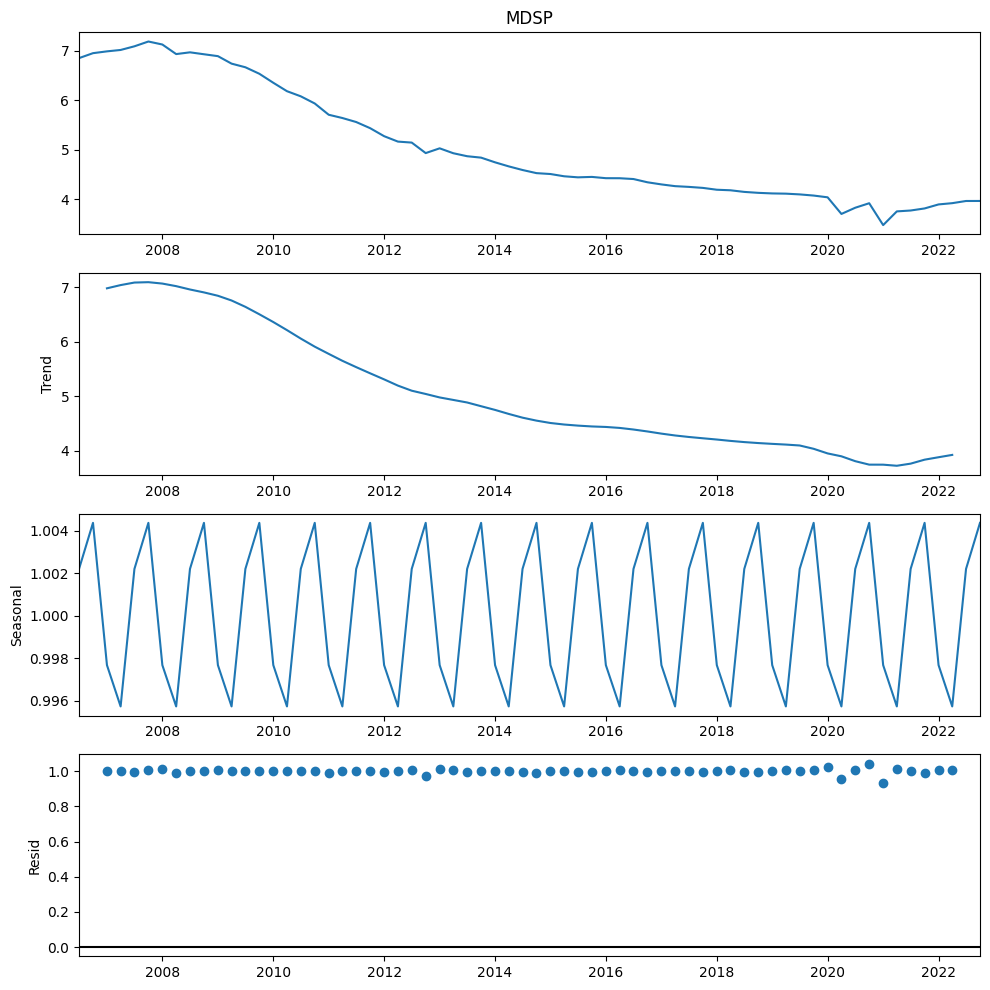

FODSP


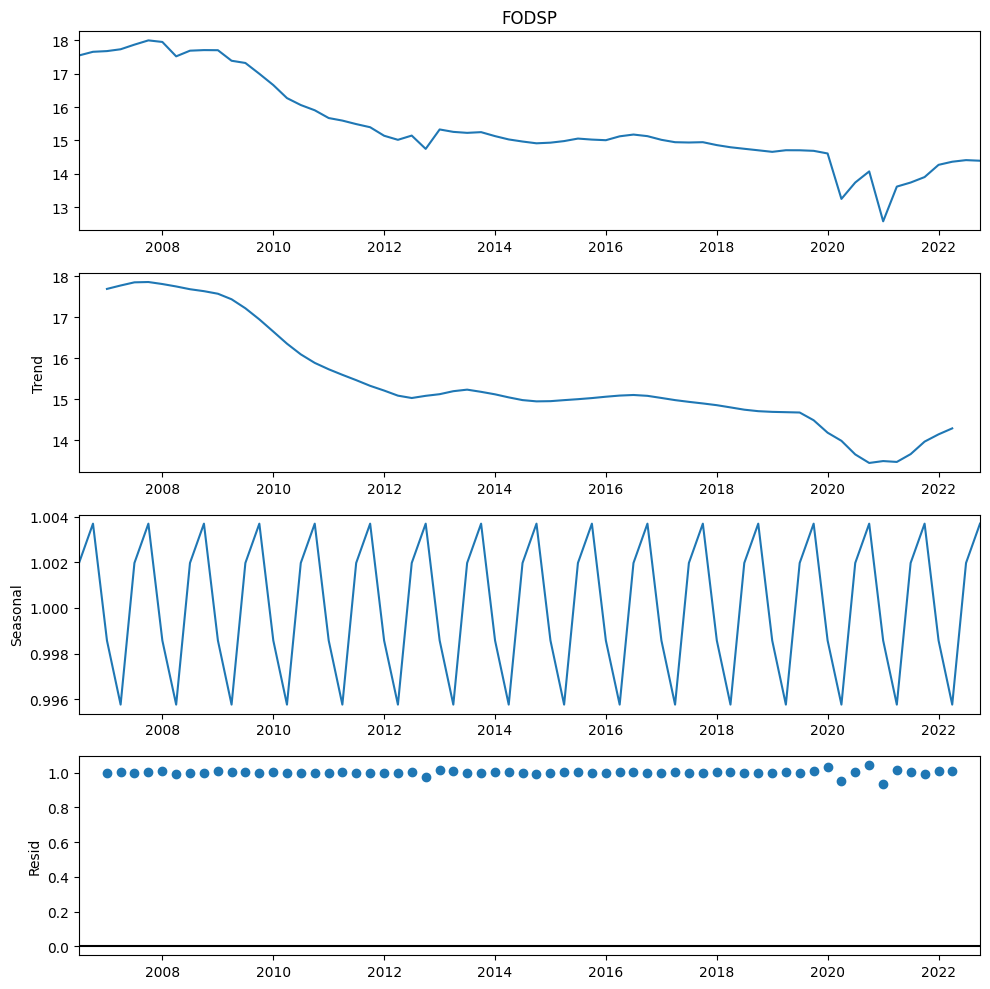

DSPIC96


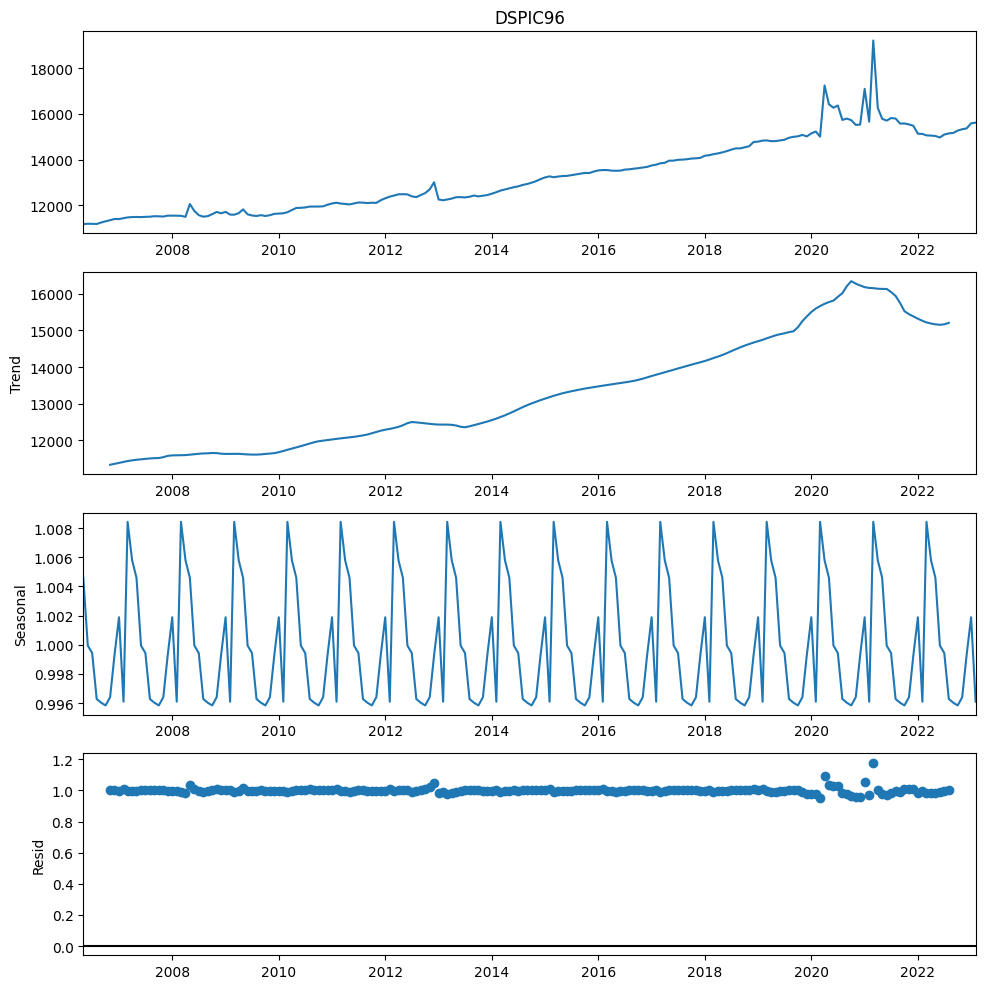

PCE


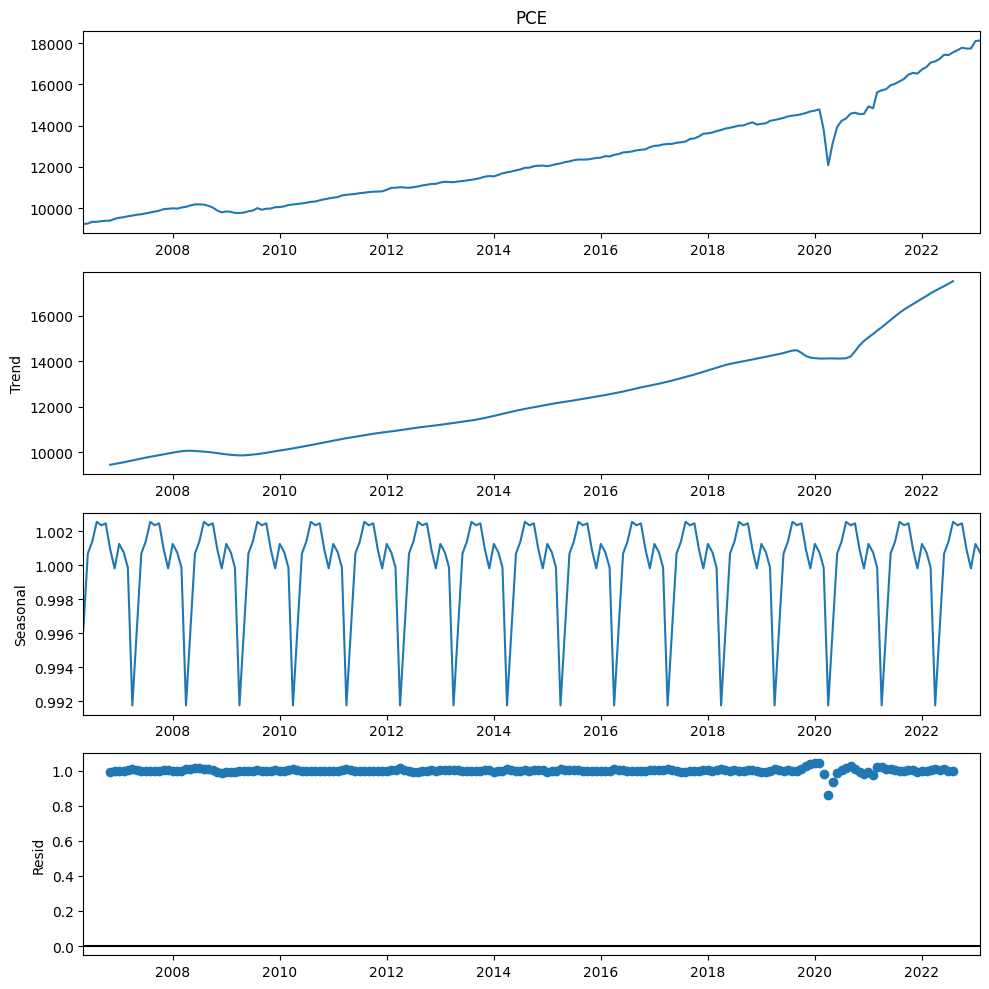

PCEDG


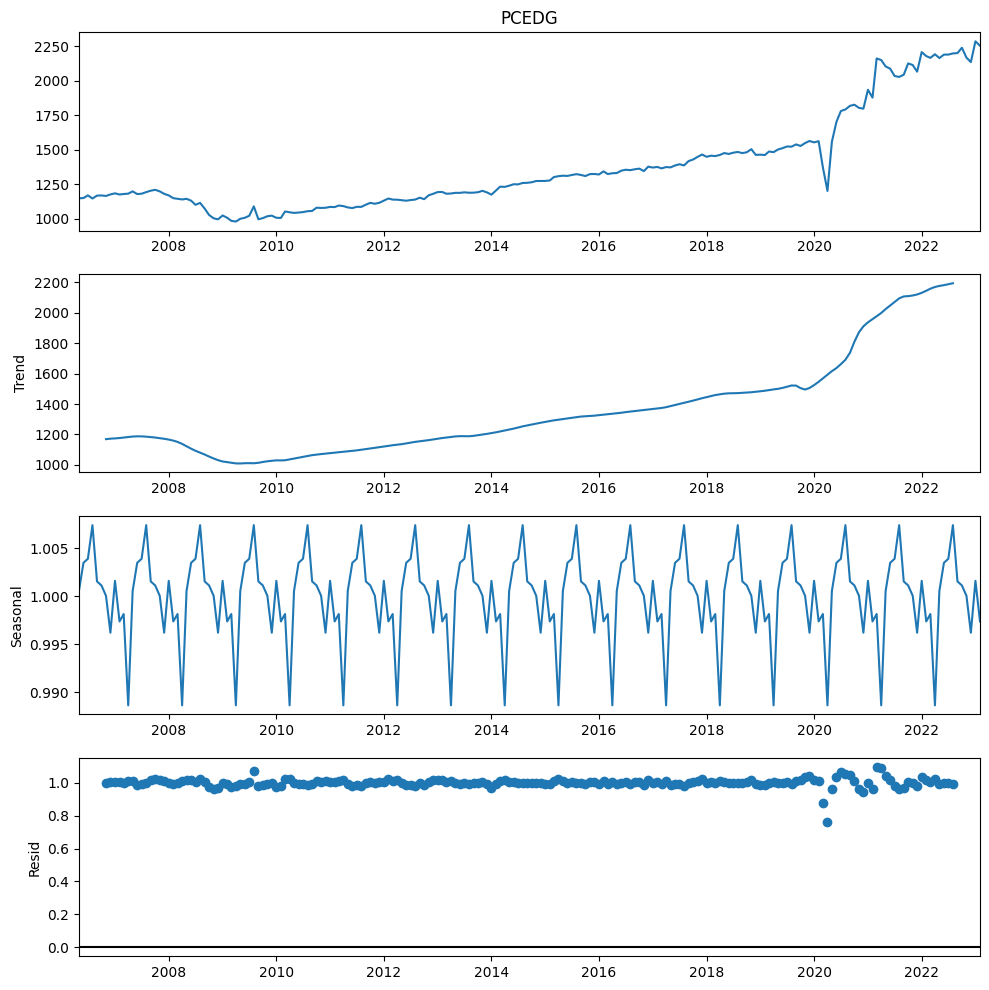

PSAVERT


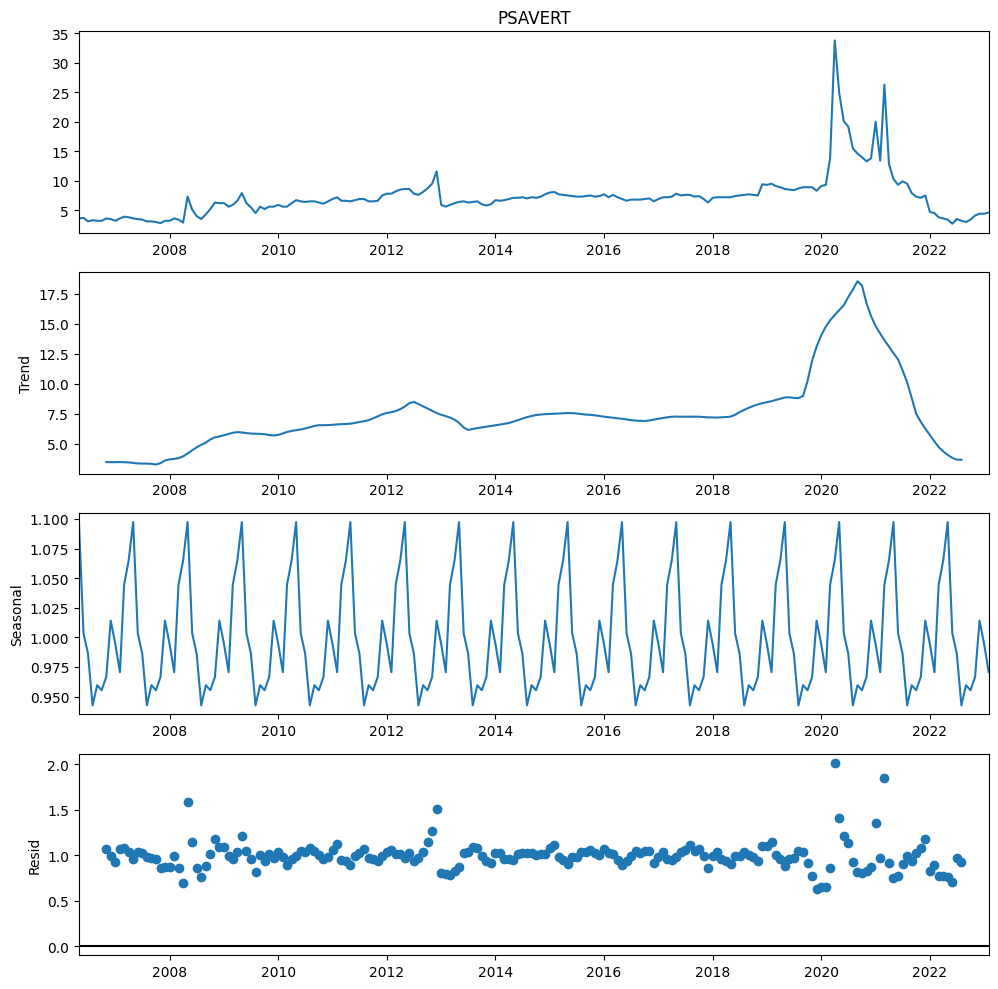

DSPI


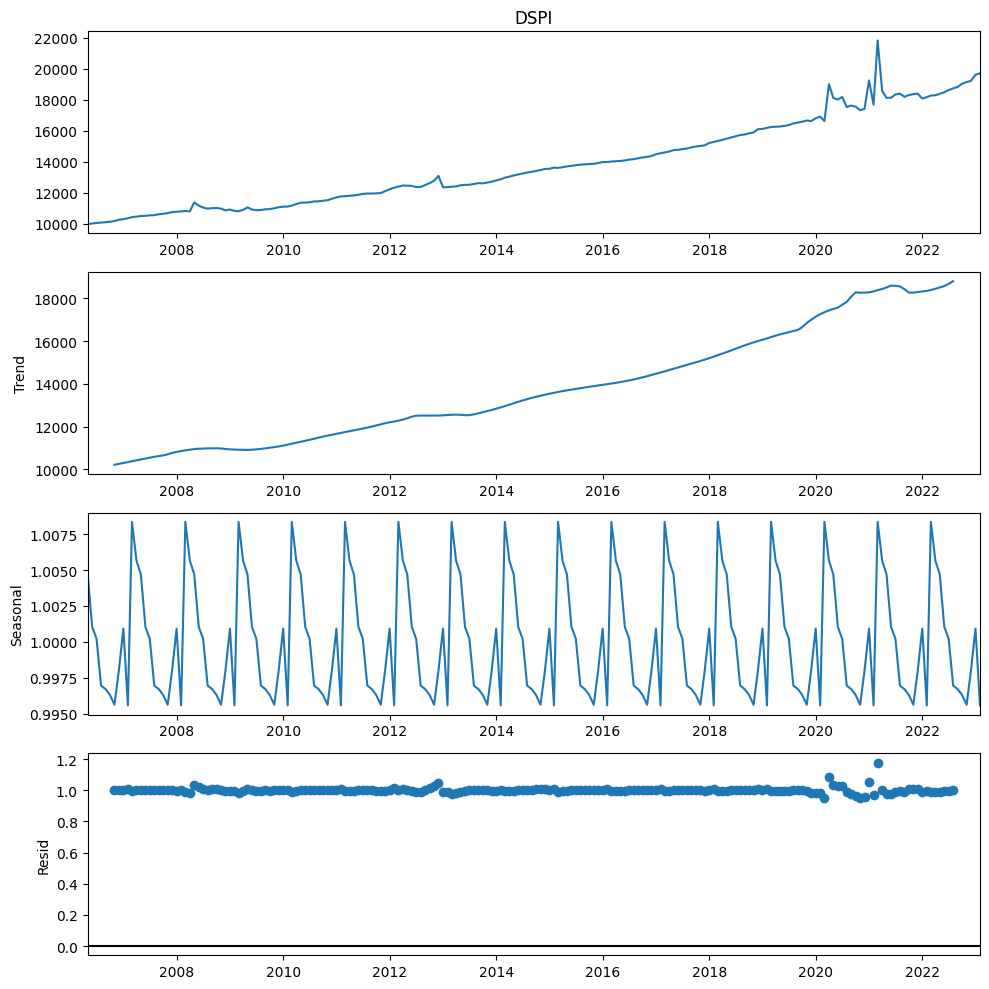

RSXFS


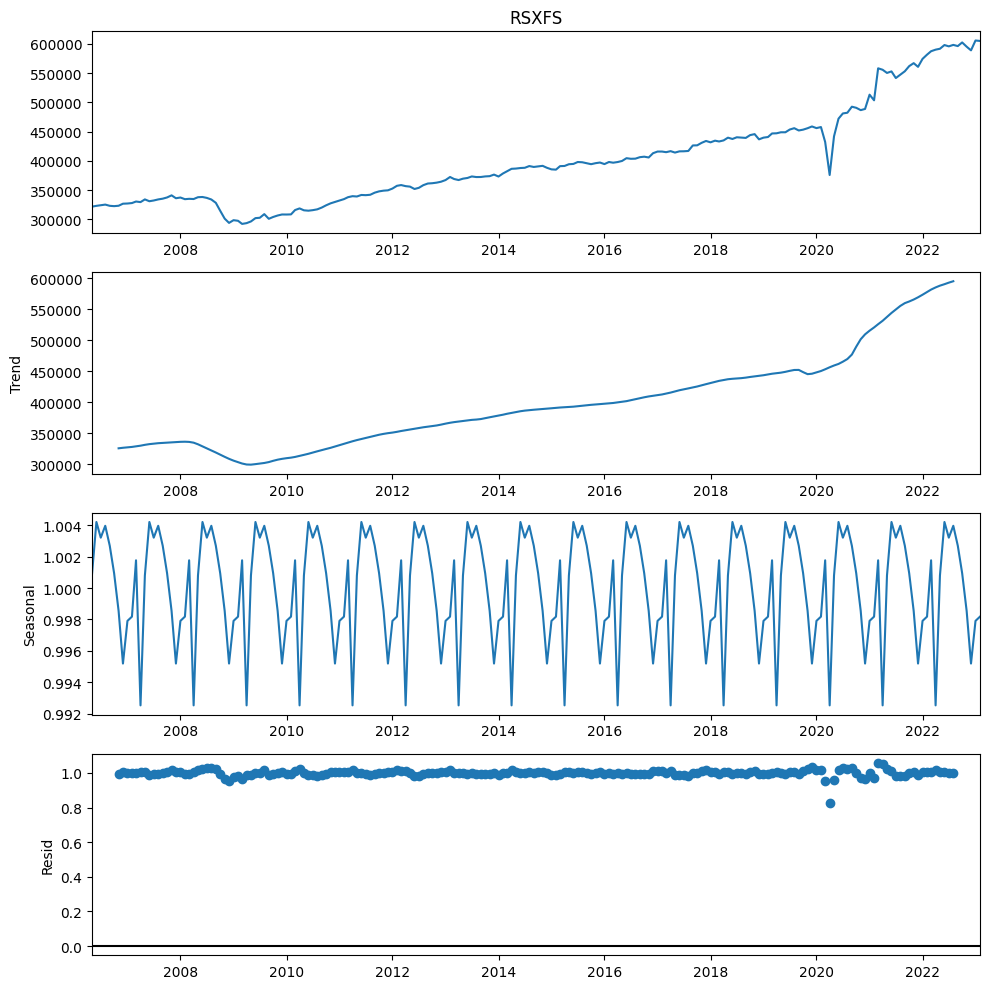

GFDEBTN


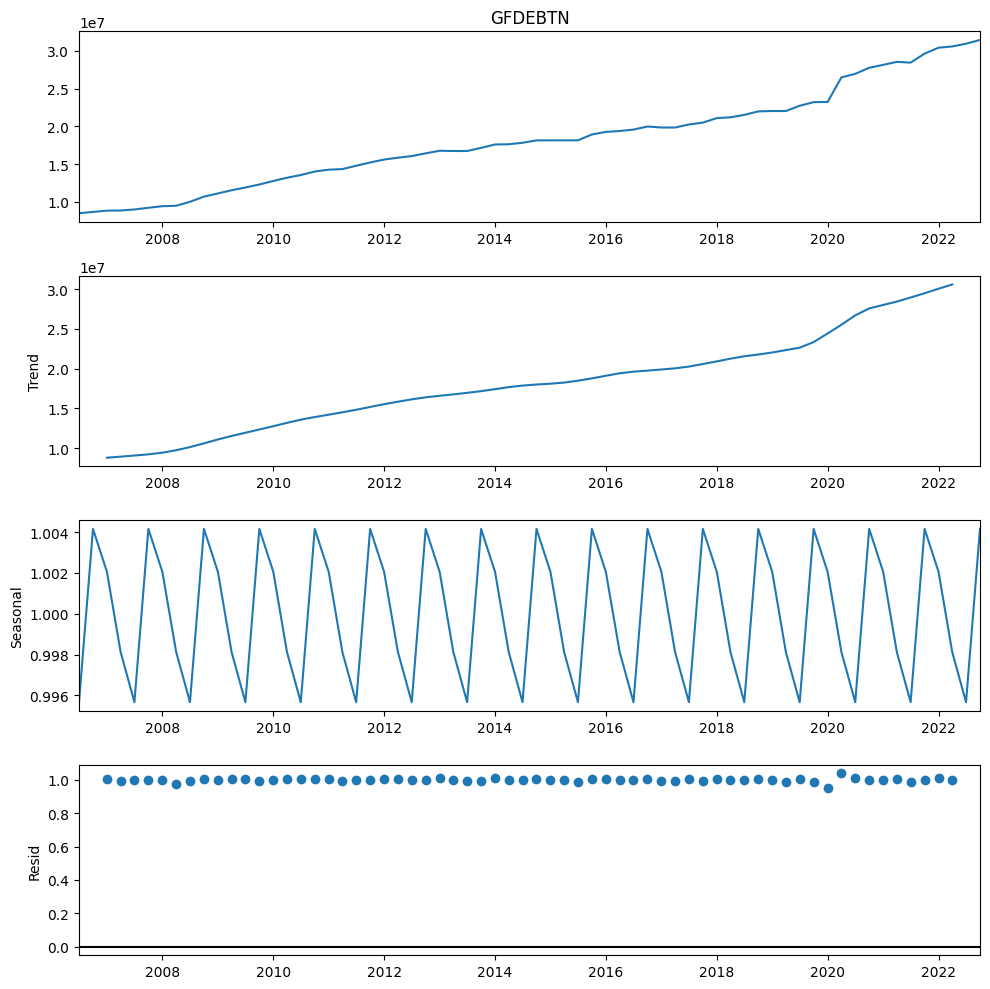

GFDEGDQ188S


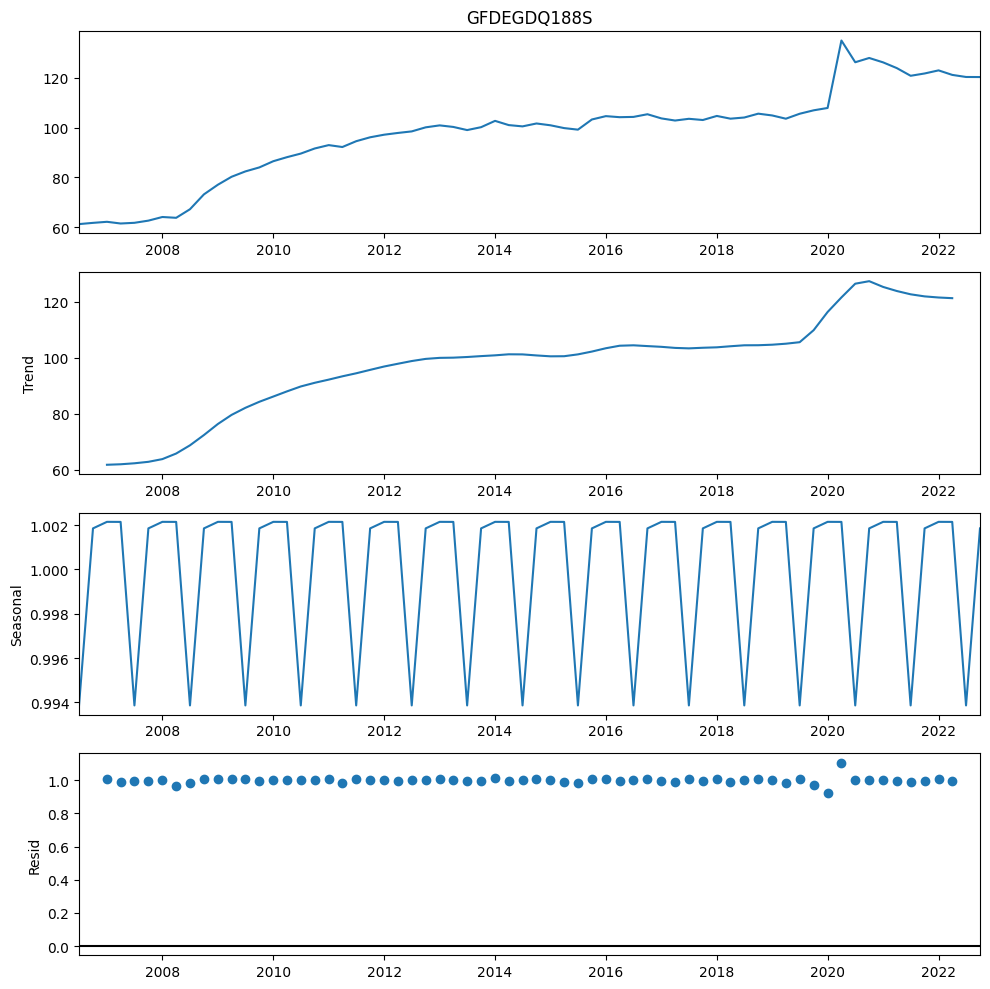

In [142]:
# Decompose macroeconomic data
for indicator in index_fred:
  df = macro_indicators[indicator][indicator]
  df.index = pd.to_datetime(df.index)
  # Y=Yearly, Q=Quarterly, M=Monthly, W=Weekly, D=Daily
  if INDICATORS_PERIODS[indicator] == 'Y':
    print(indicator) 
    seasonal_vde = seasonal_decompose(df, model="multiplicative",period = 1)     
    plt.rcParams["figure.figsize"] = (10,10)
    seasonal_vde.plot()
    plt.show()
  if INDICATORS_PERIODS[indicator] == 'Q':
    print(indicator) 
    seasonal_vde = seasonal_decompose(df, model="multiplicative",period = 4)      
    plt.rcParams["figure.figsize"] = (10,10)
    seasonal_vde.plot()
    plt.show()
  if INDICATORS_PERIODS[indicator] == 'M':
    print(indicator) 
    seasonal_vde = seasonal_decompose(df, model="multiplicative",period = 12)      
    plt.rcParams["figure.figsize"] = (10,10)
    seasonal_vde.plot()
    plt.show()
  if INDICATORS_PERIODS[indicator] == 'W':
    print(indicator) 
    seasonal_vde = seasonal_decompose(df, model="multiplicative",period = 52)
    plt.rcParams["figure.figsize"] = (10,10)
    seasonal_vde.plot()
    plt.show()
  if INDICATORS_PERIODS[indicator] == 'D':
    # print(indicator)
    seasonal_vde = seasonal_decompose(df, model="multiplicative",period = 365)        
    plt.rcParams["figure.figsize"] = (10,10)
    seasonal_vde.plot()
    plt.show()
  # print(macro_indicators[indicator][indicator].head(5))

## Data Visualisation for Vanguard ETF

<Axes: title={'center': 'Vanguard Energy Index ETF'}, xlabel='Date'>

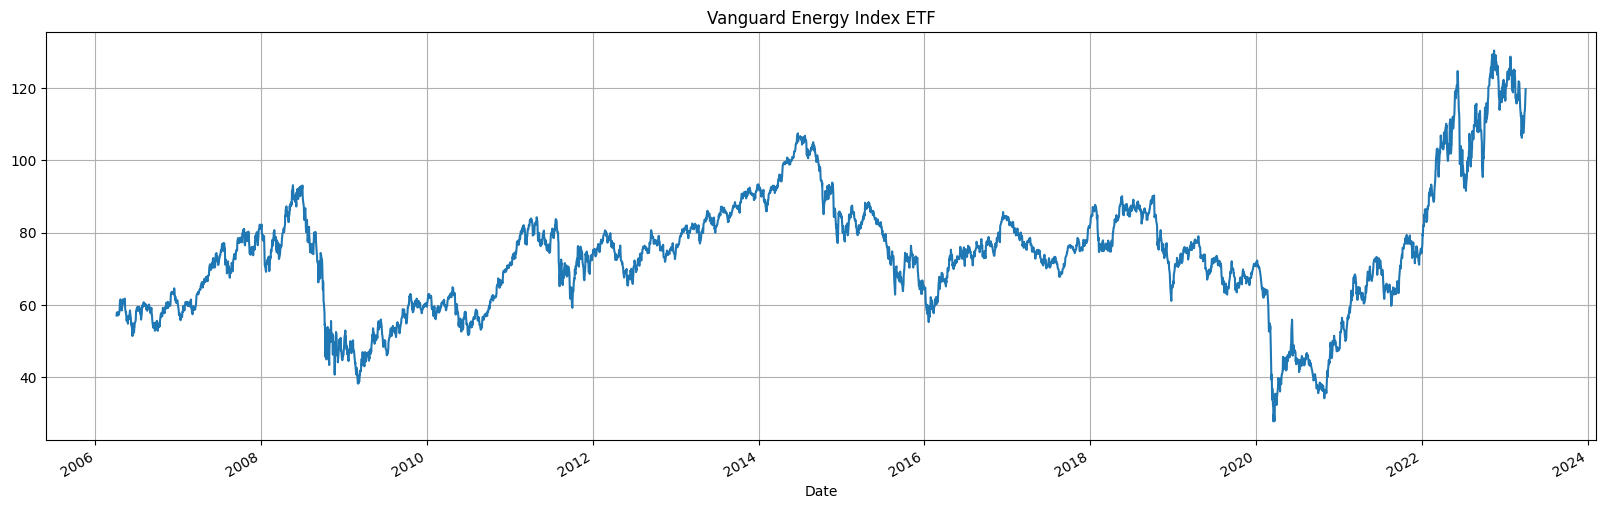

In [32]:
macro_indicators['VDE.US']['Close'].plot.line(figsize=(20,6), grid = True, title='Vanguard Energy Index ETF')

<Axes: title={'center': 'Vanguard Health Index ETF'}, xlabel='Date'>

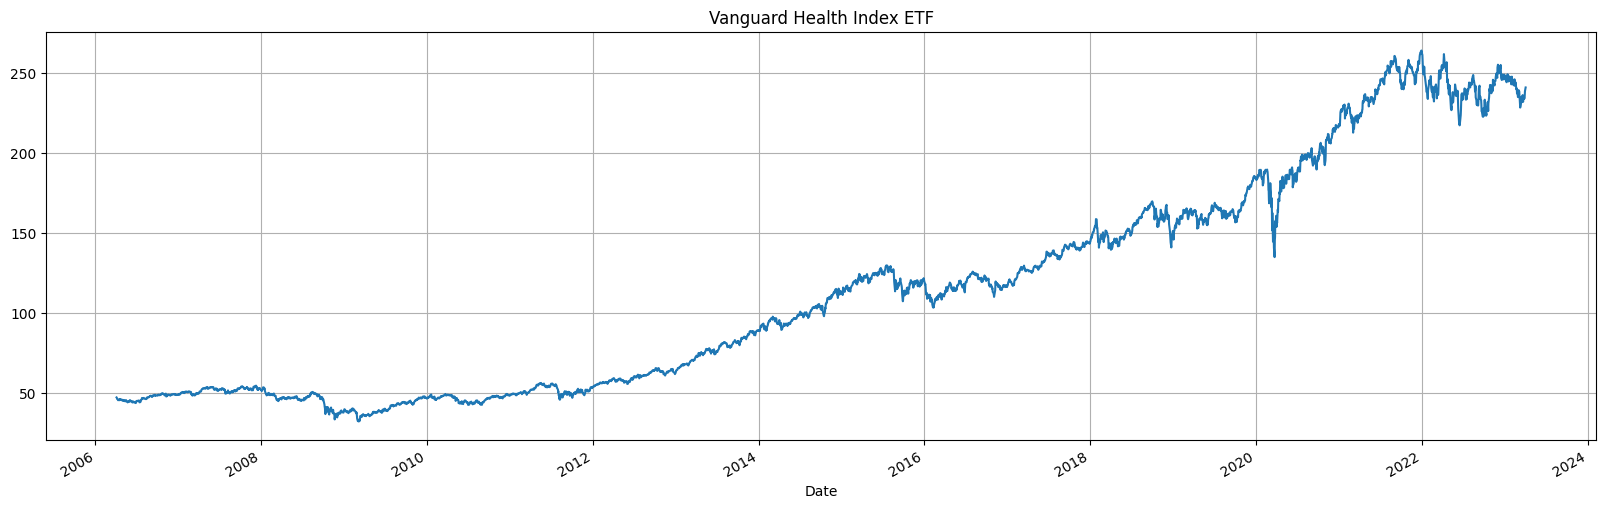

In [28]:
macro_indicators['VHT.US']['Close'].plot.line(figsize=(20,6), grid = True, title='Vanguard Health Index ETF')

## Data Visualisation for Macroeconomic Indicators

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


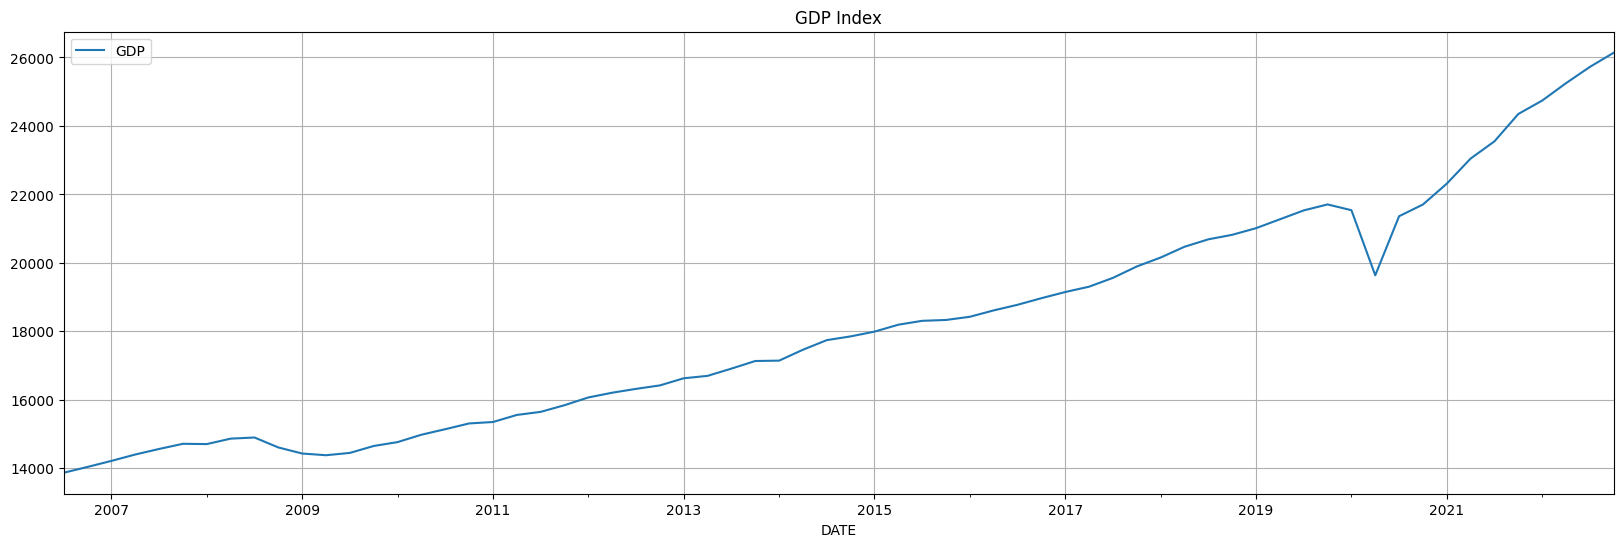

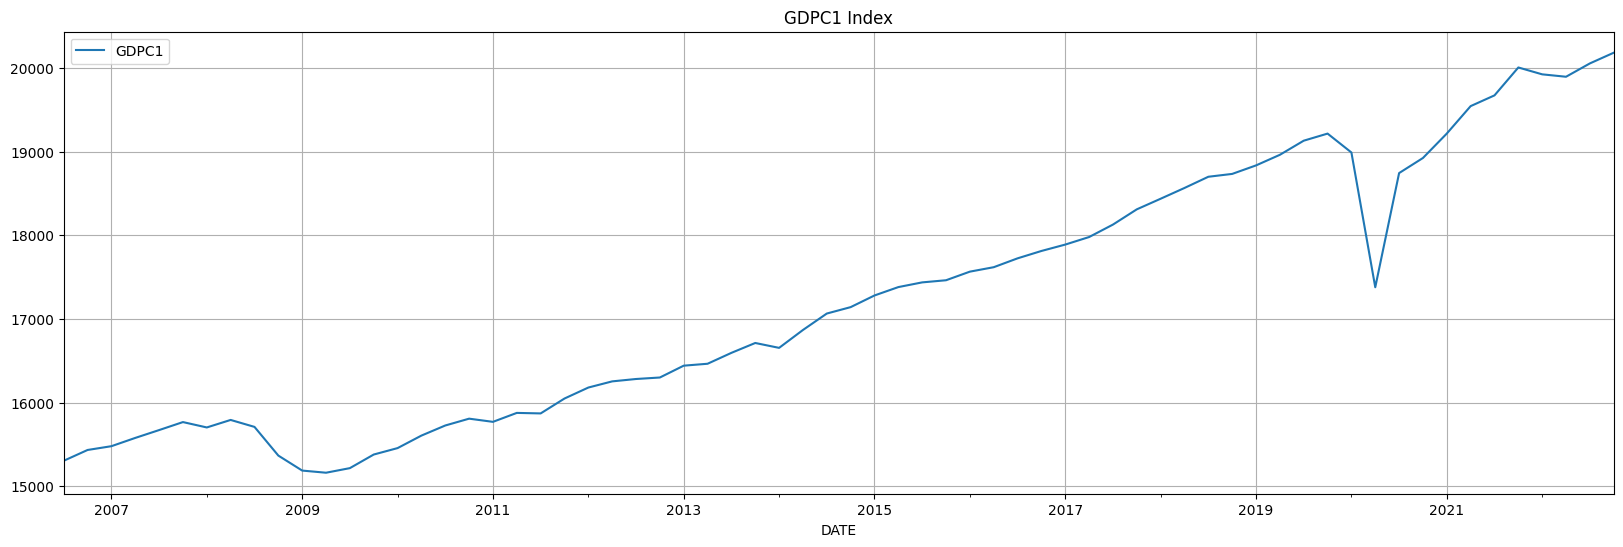

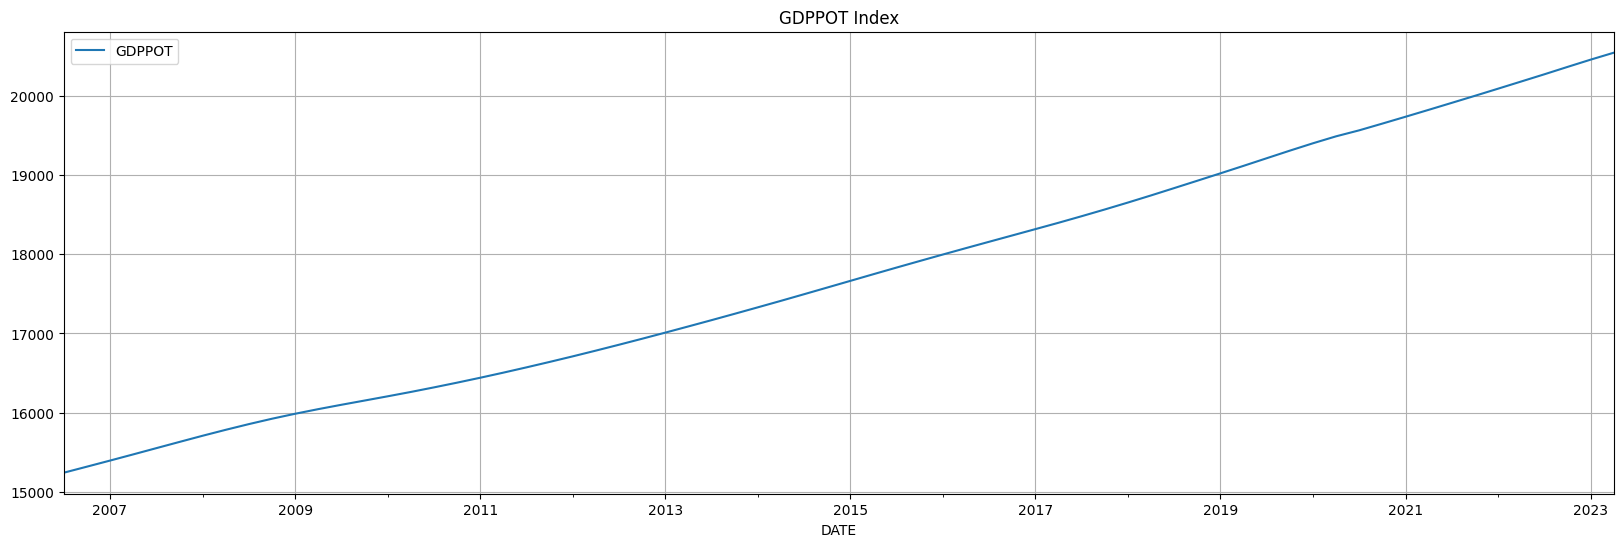

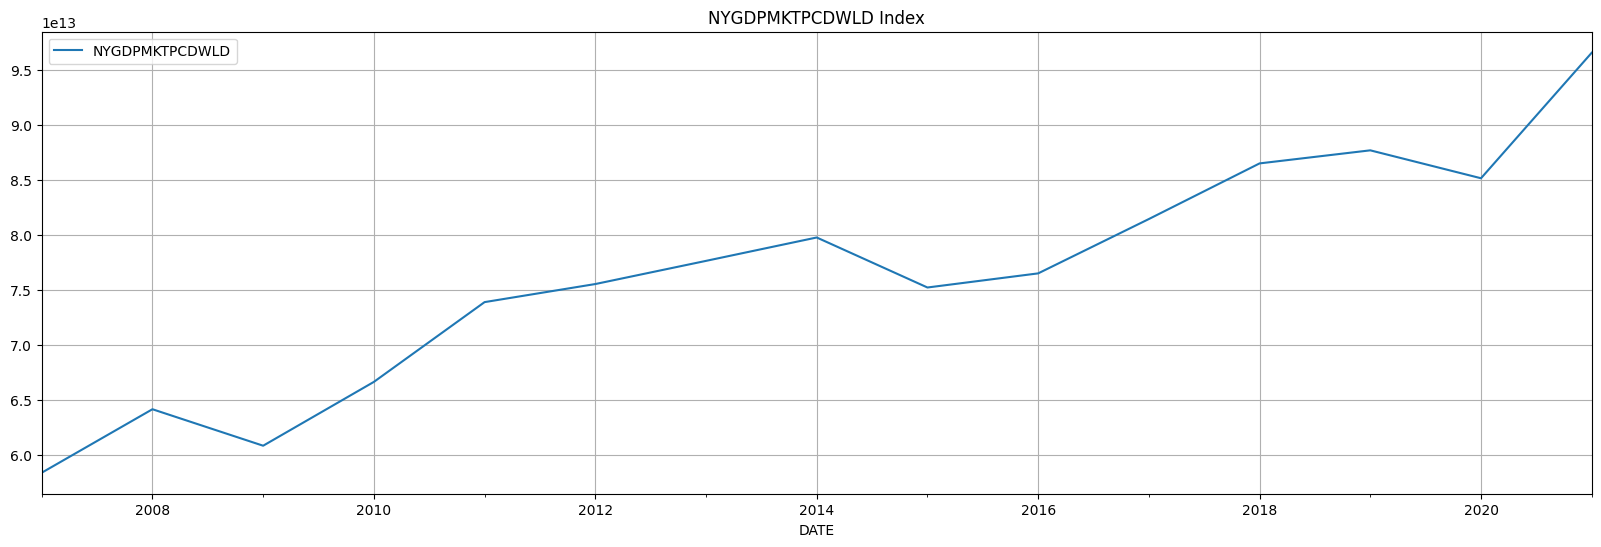

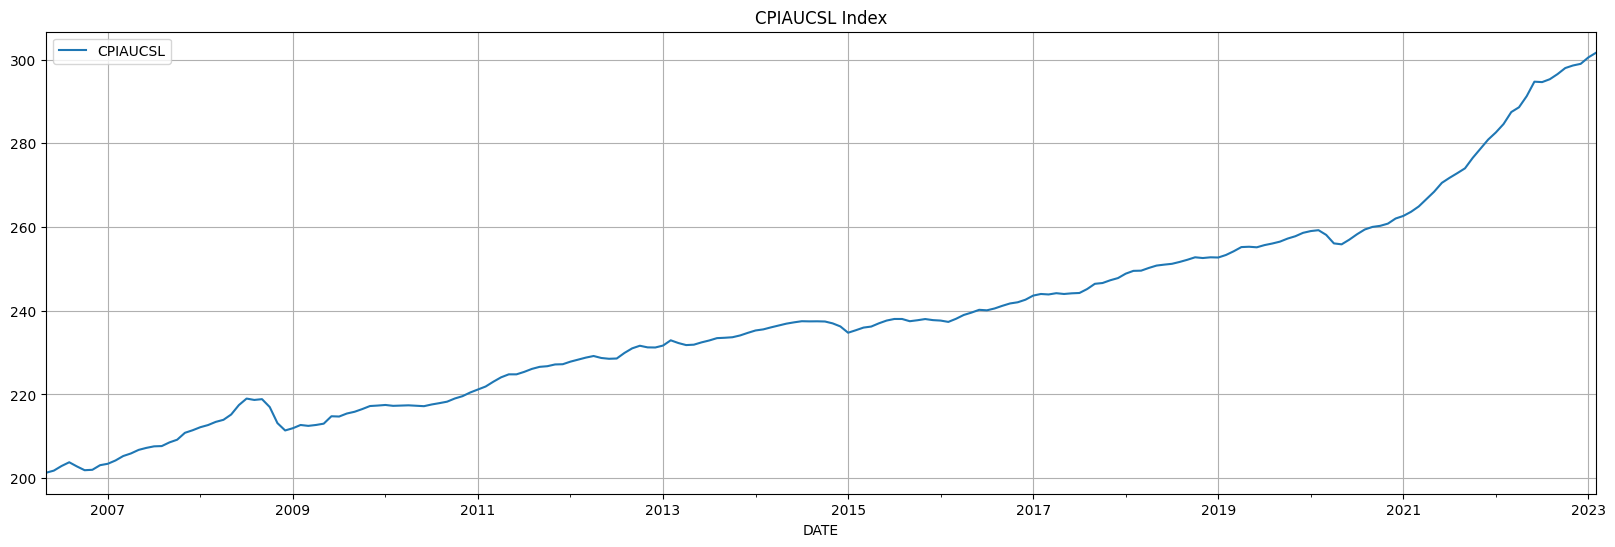

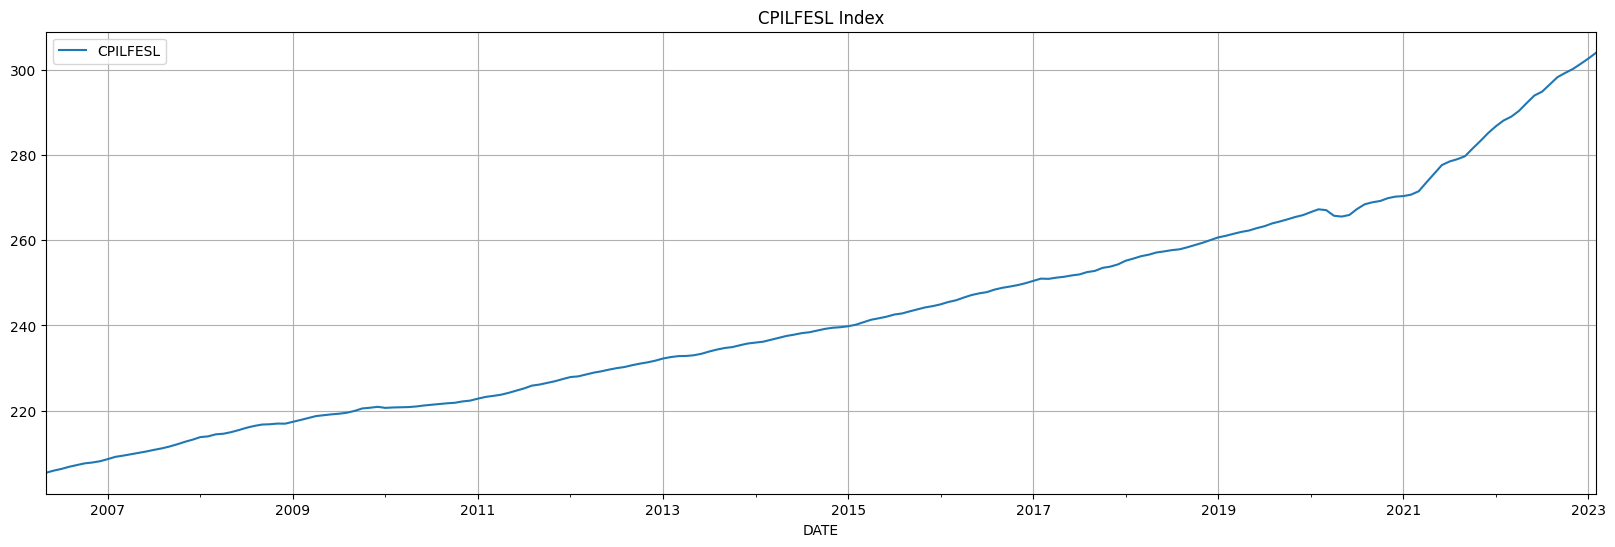

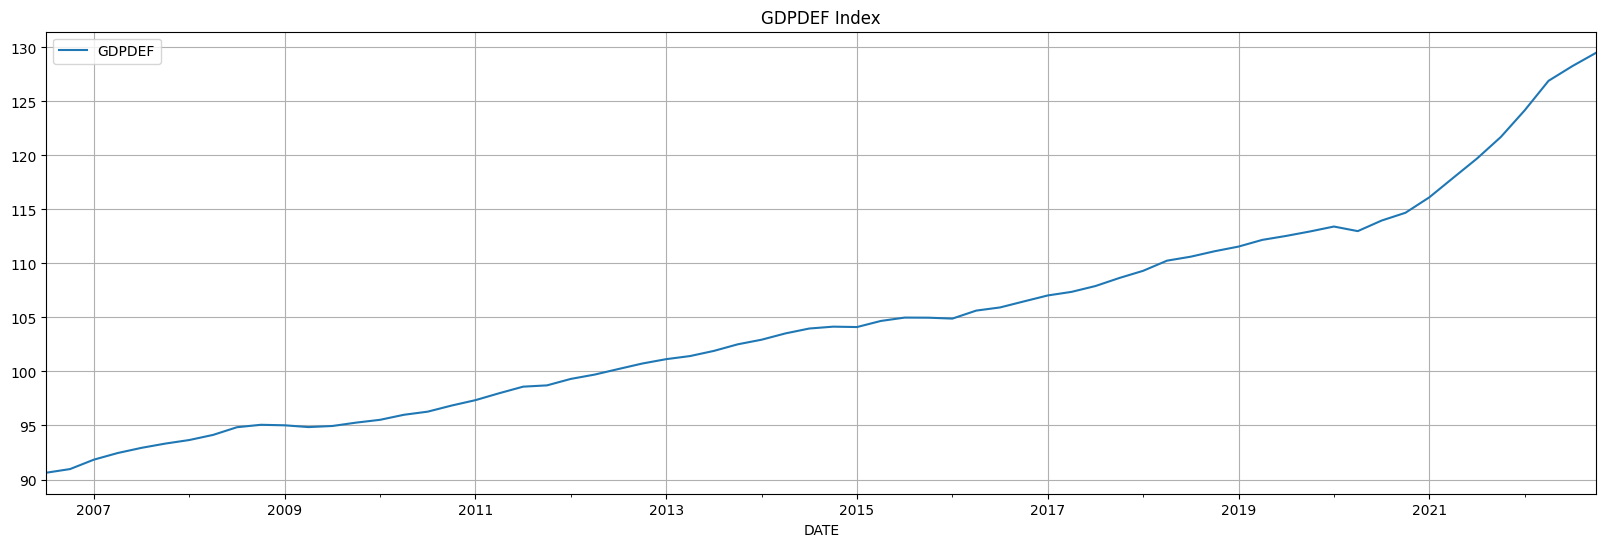

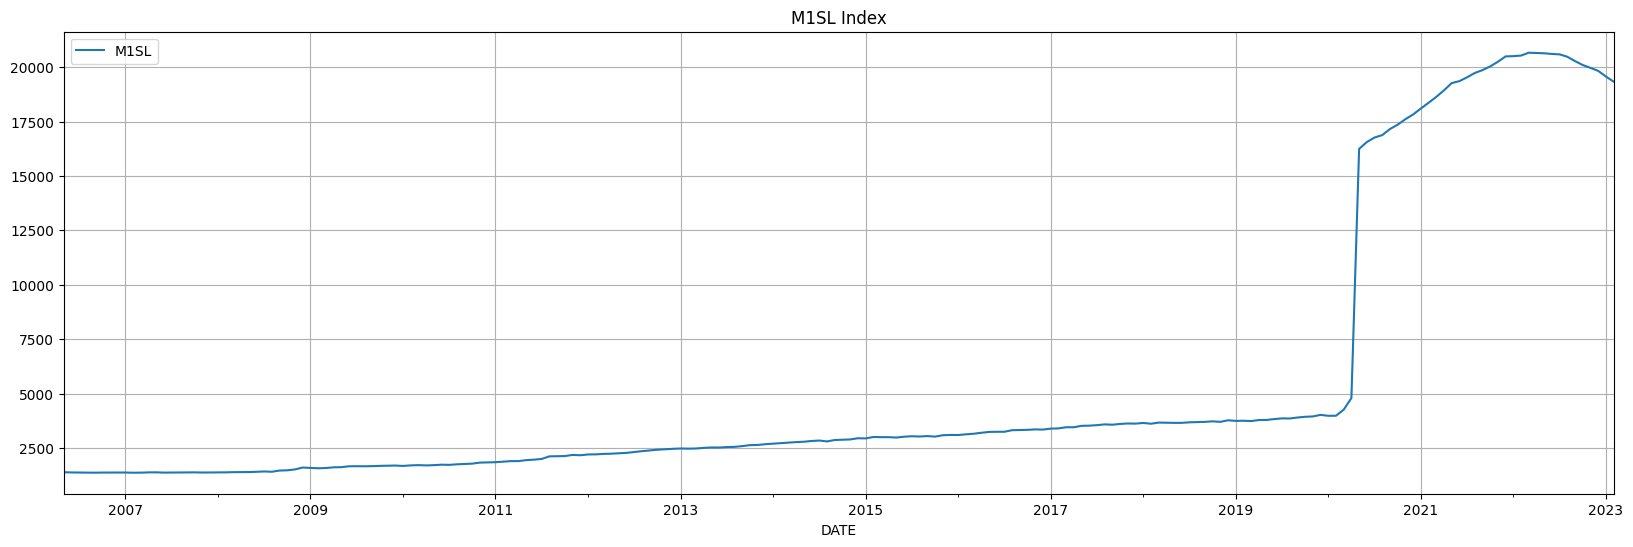

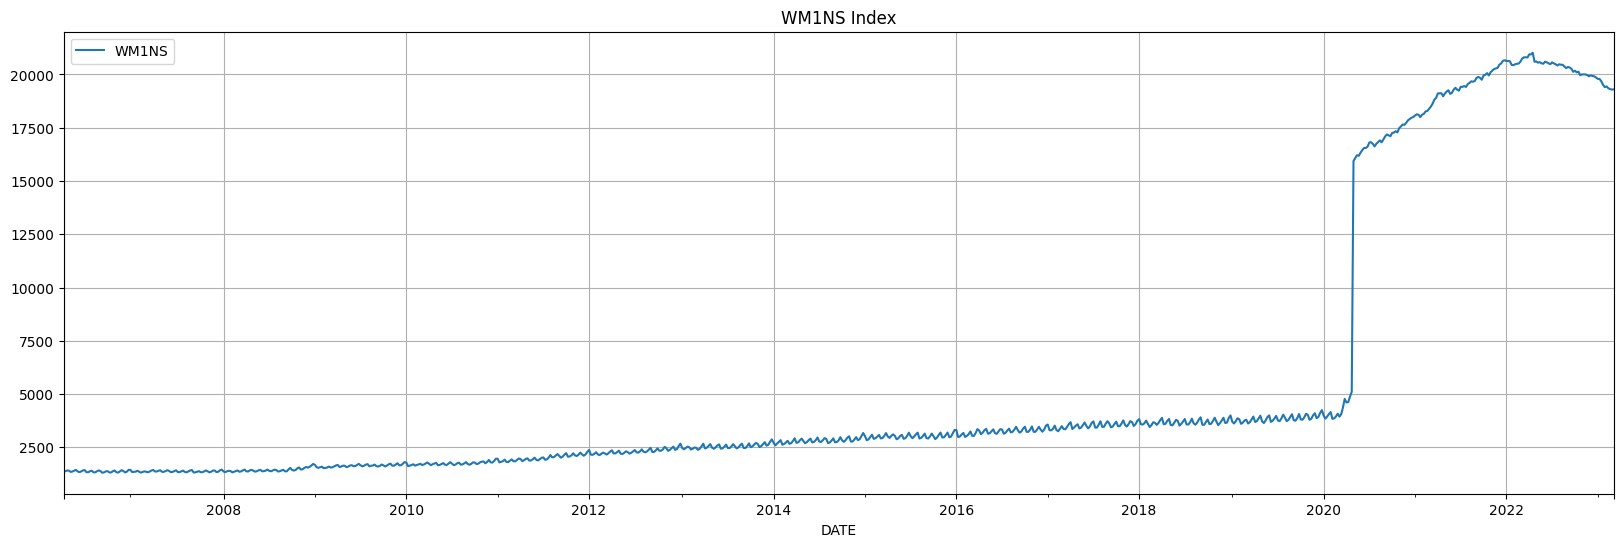

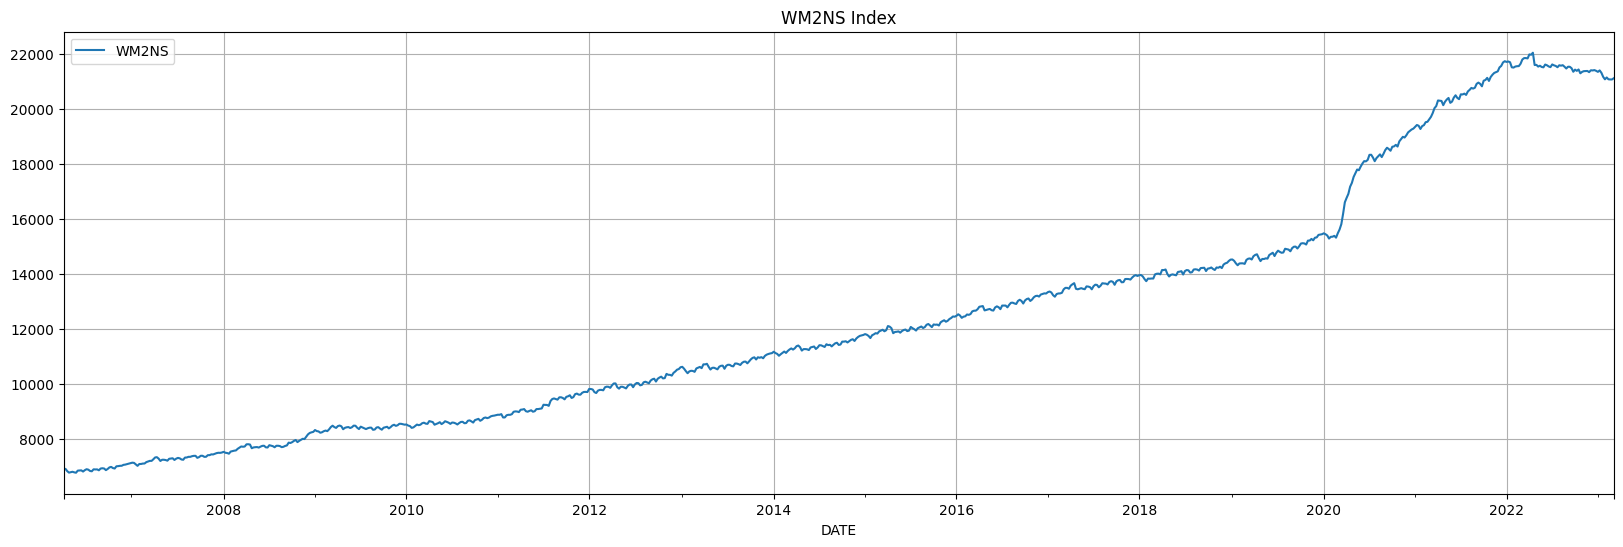

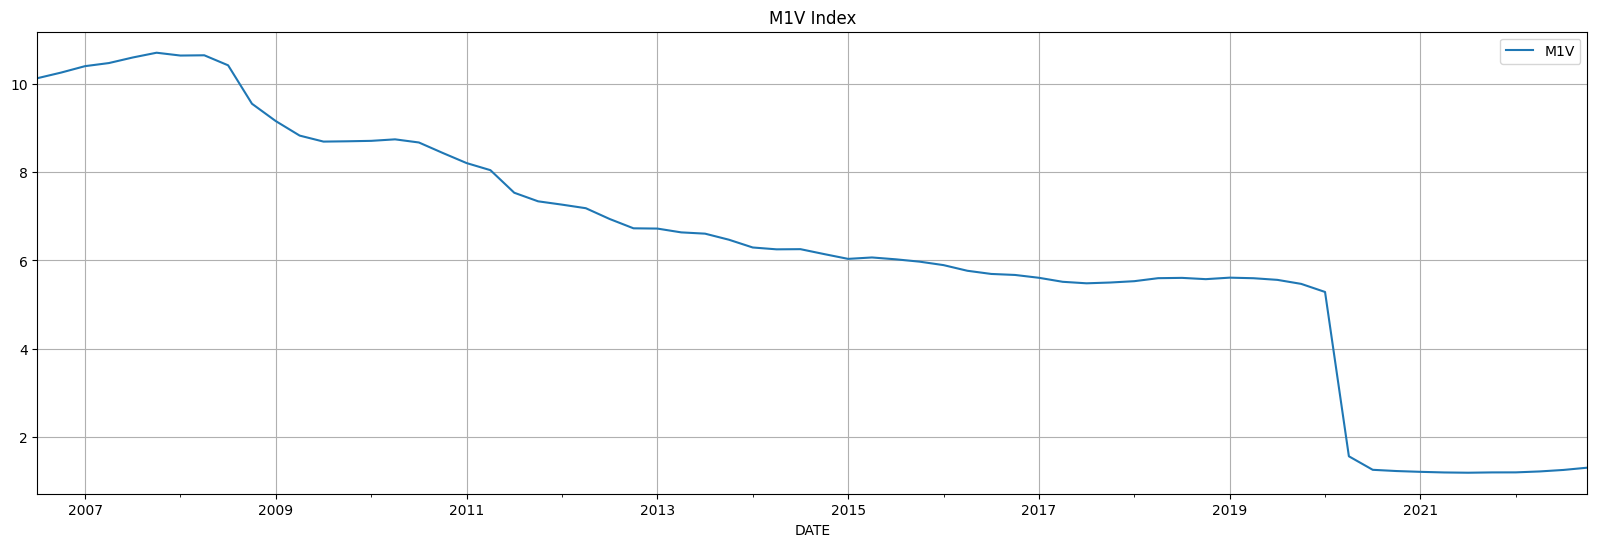

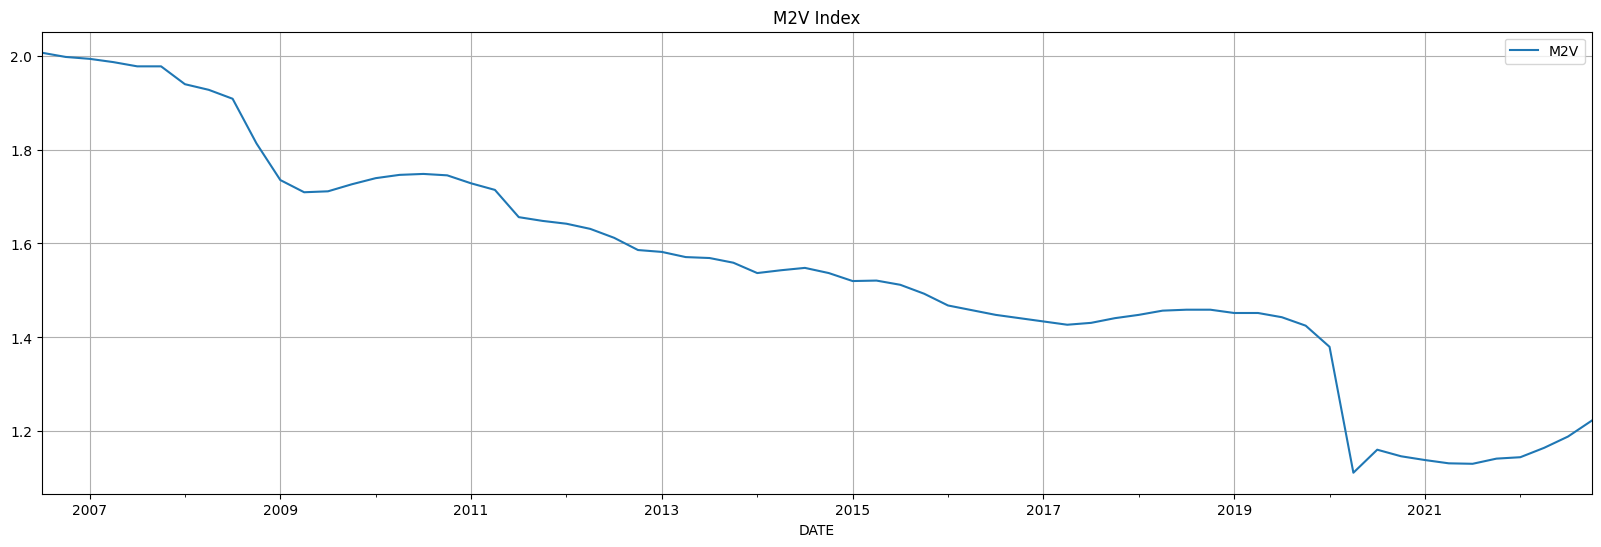

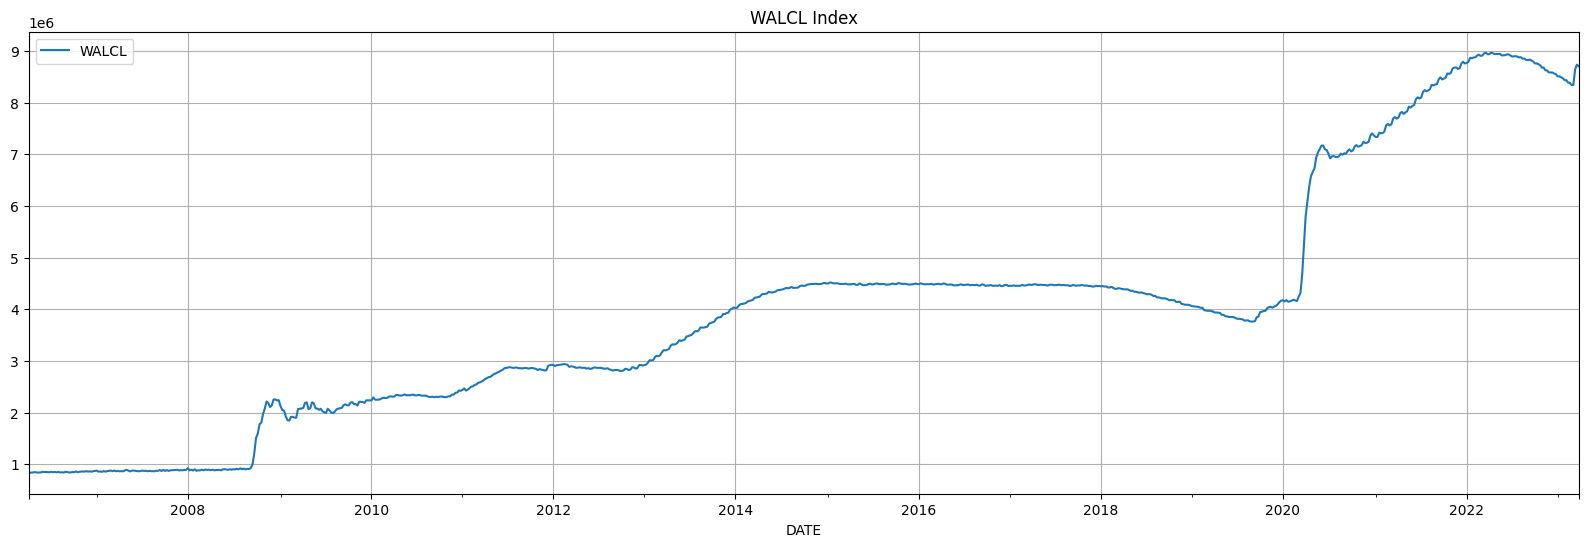

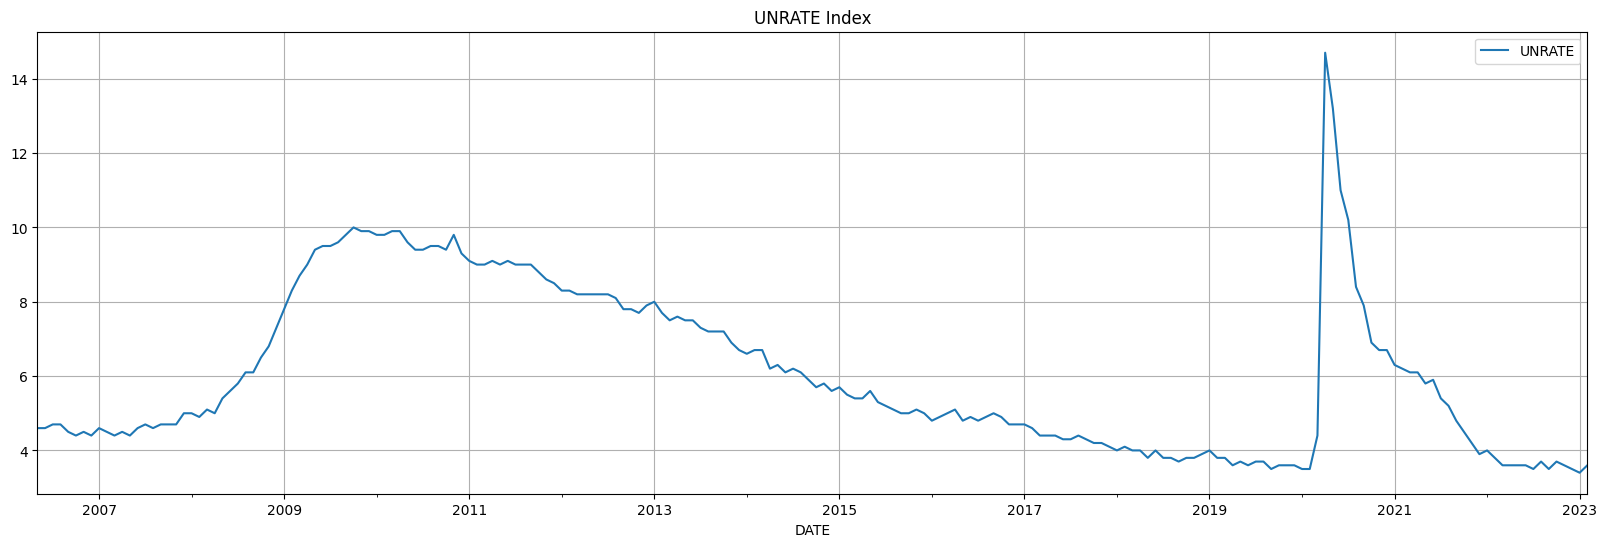

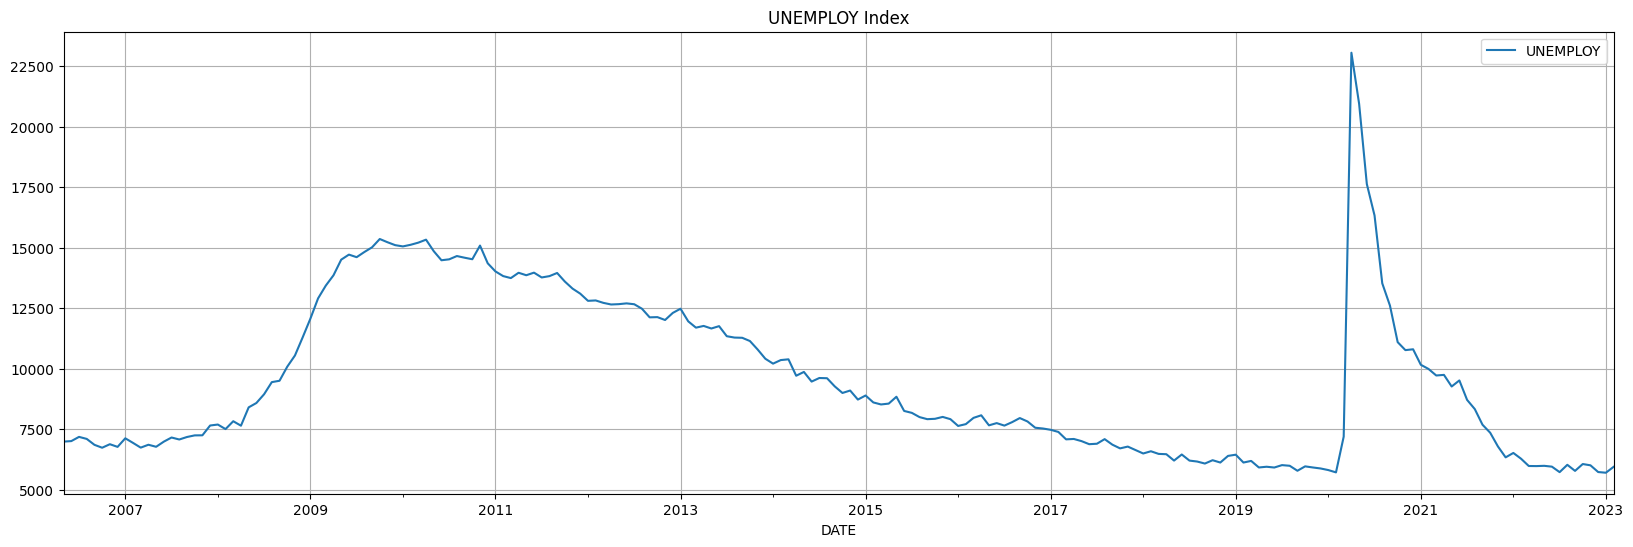

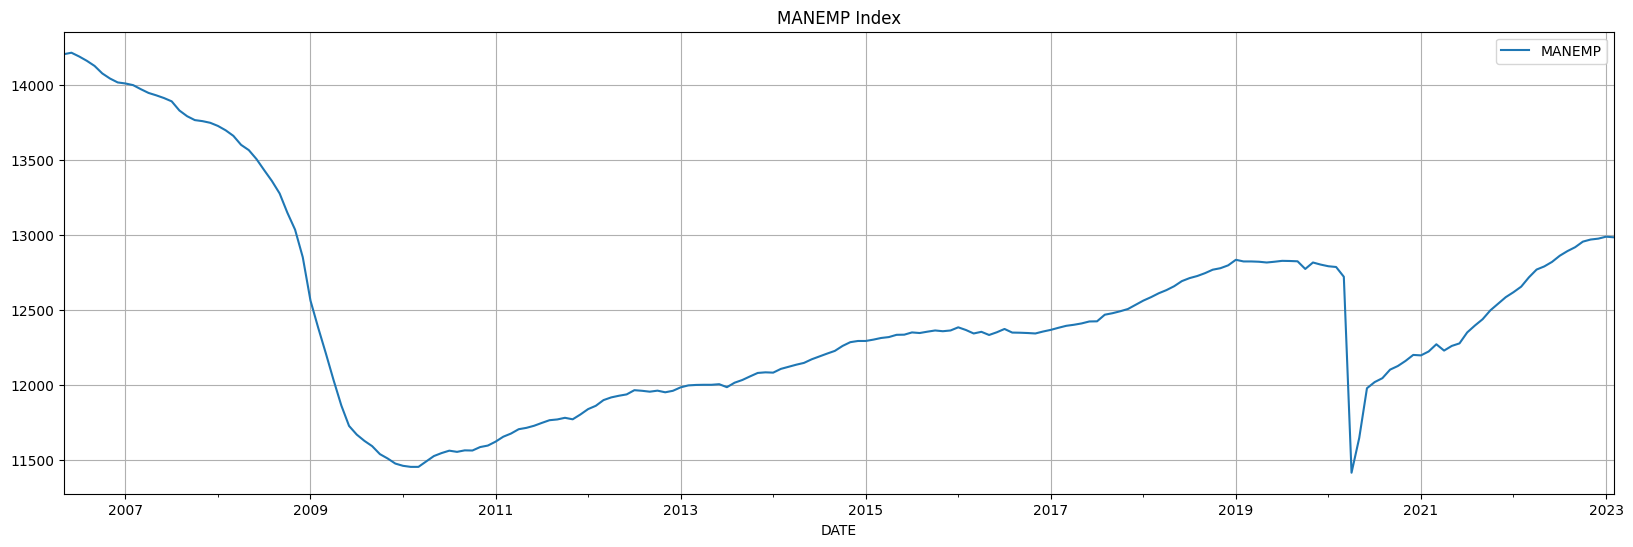

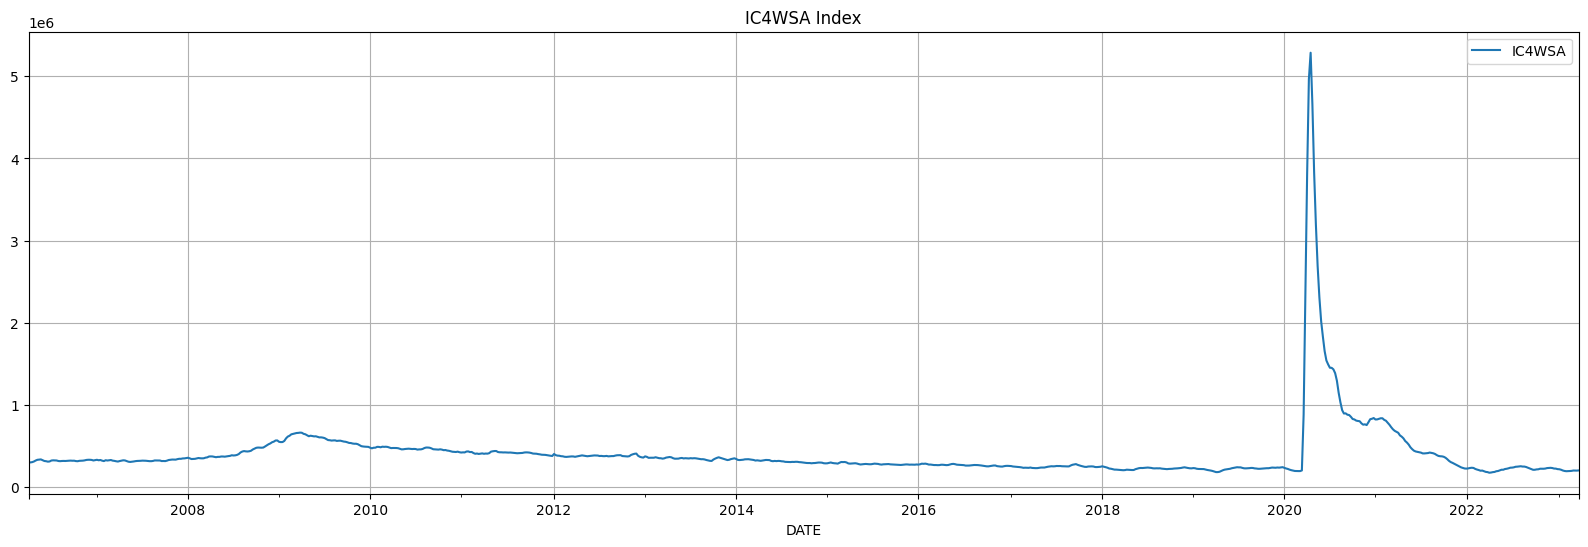

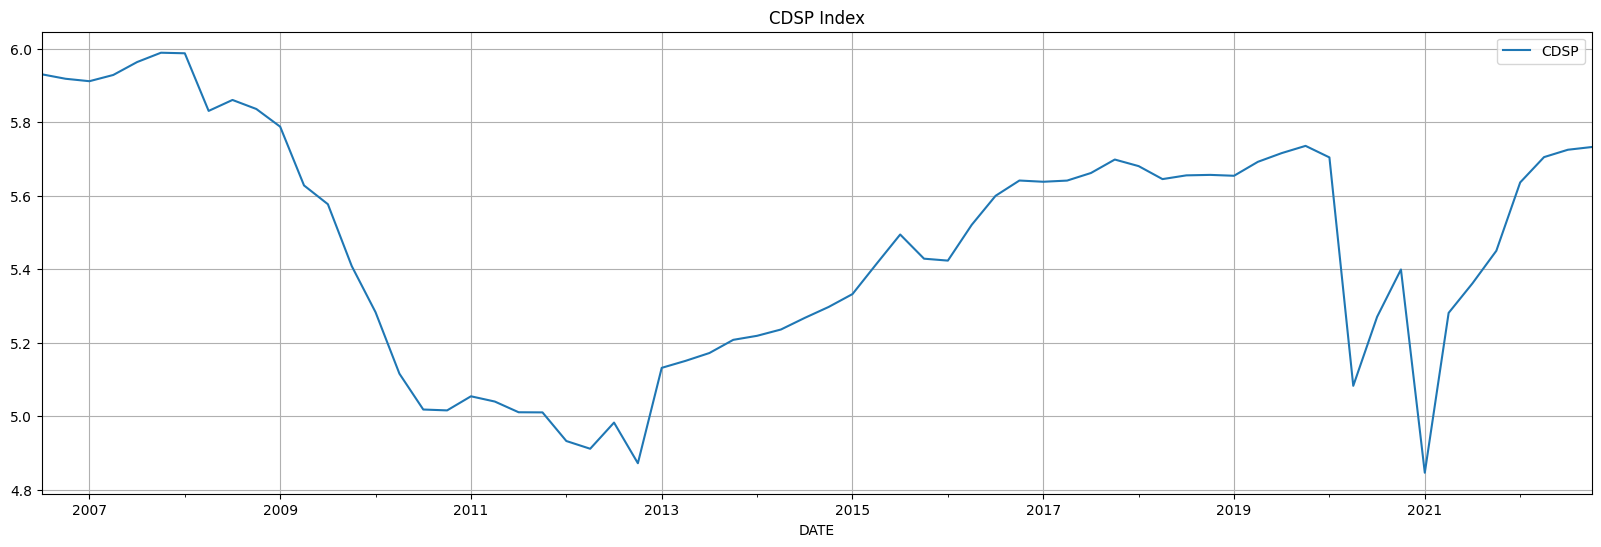

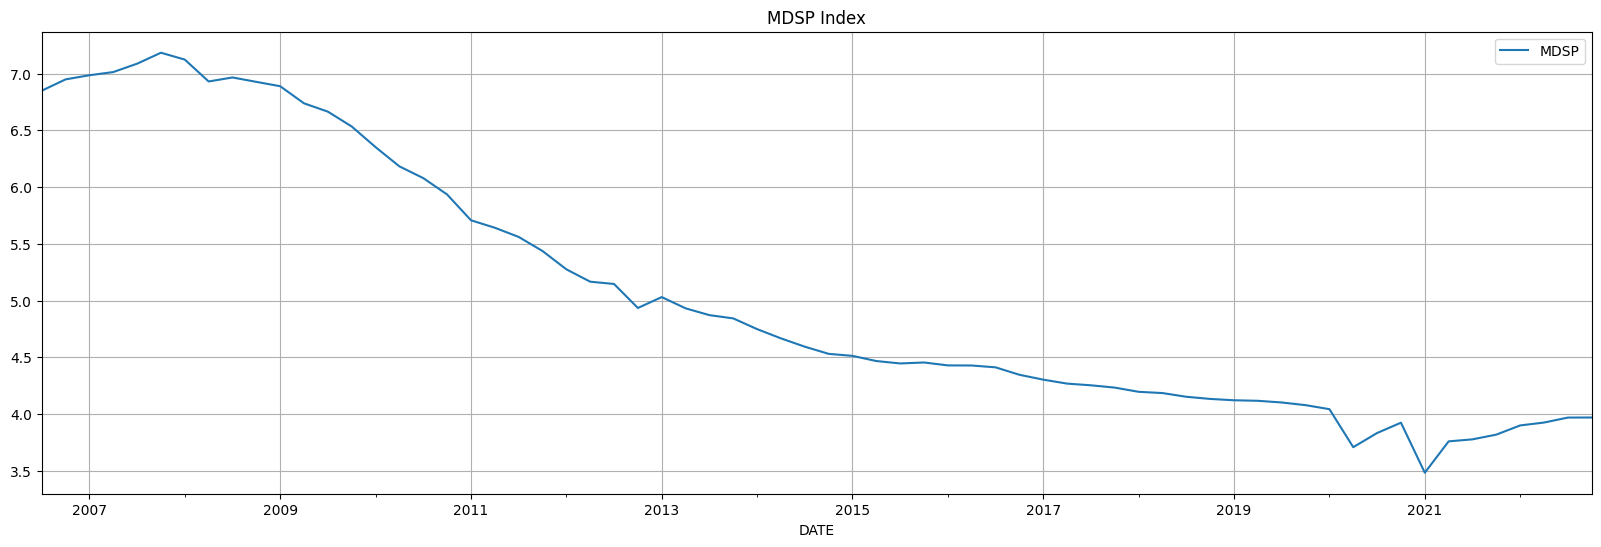

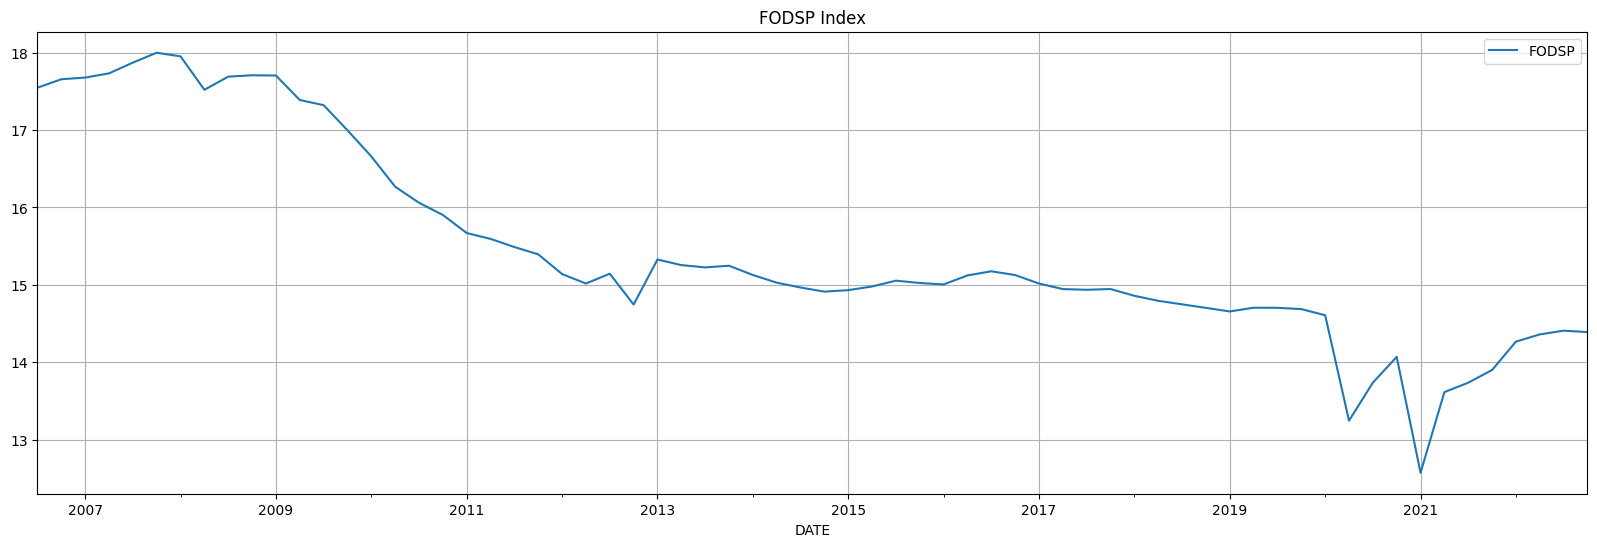

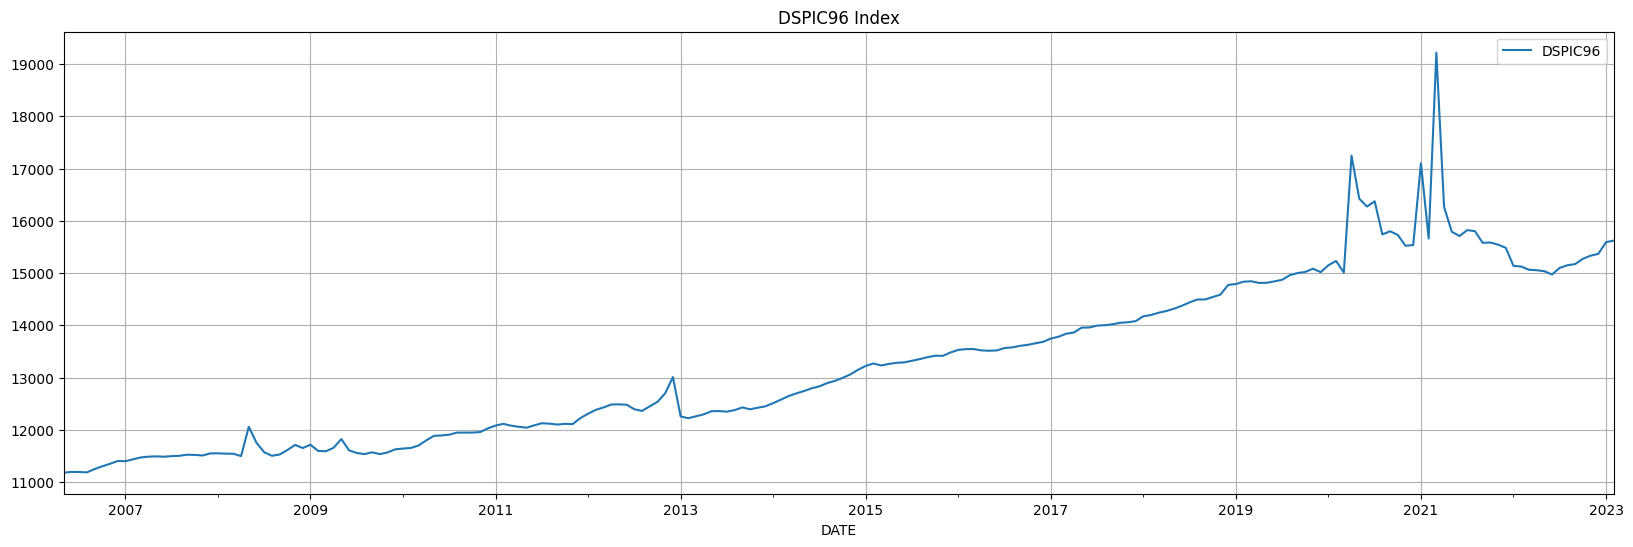

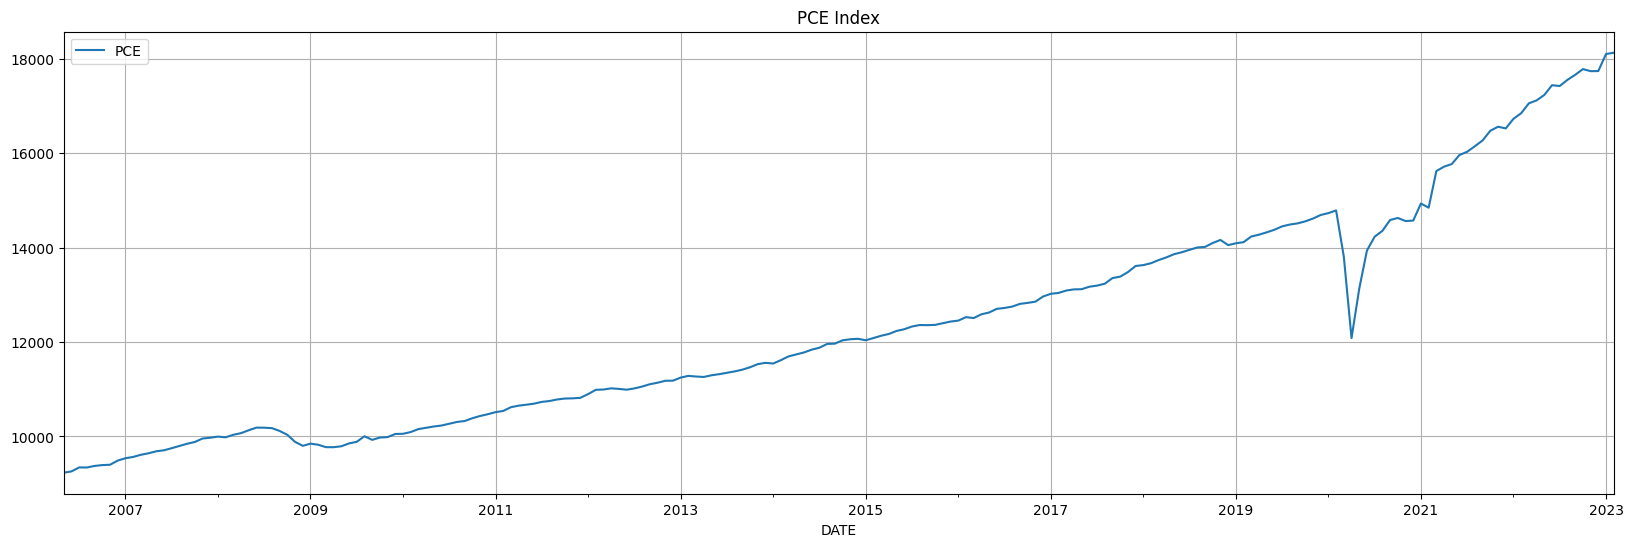

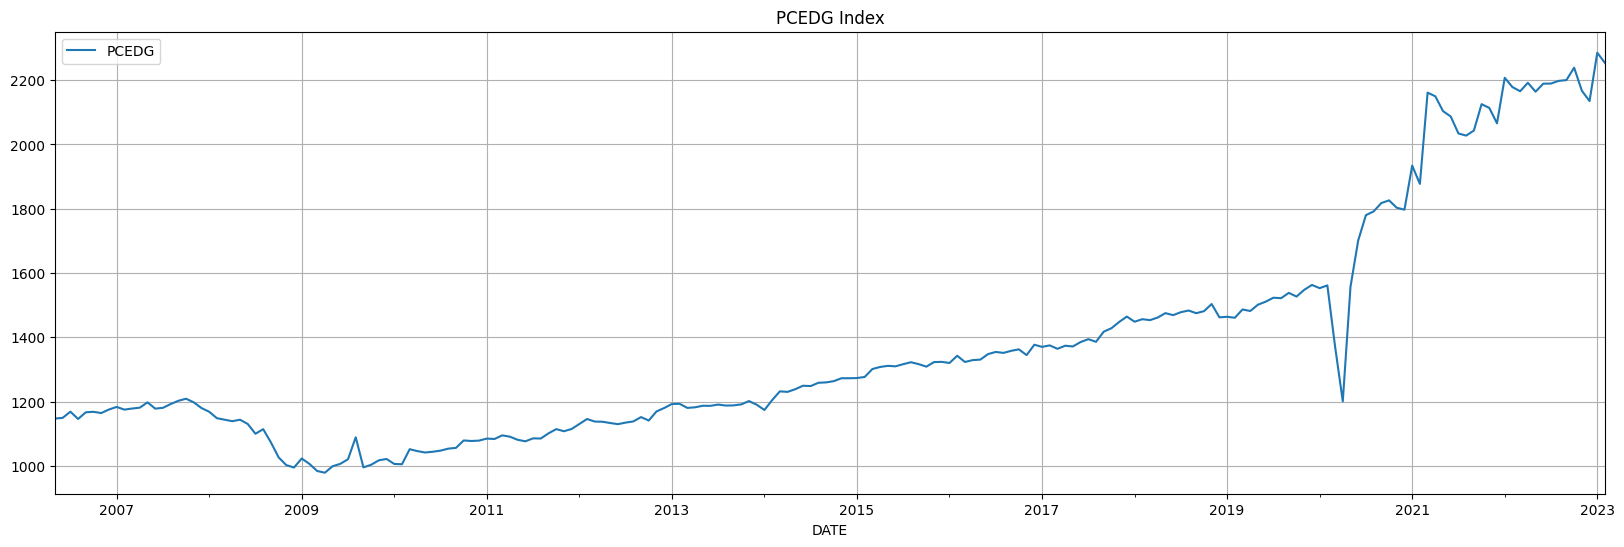

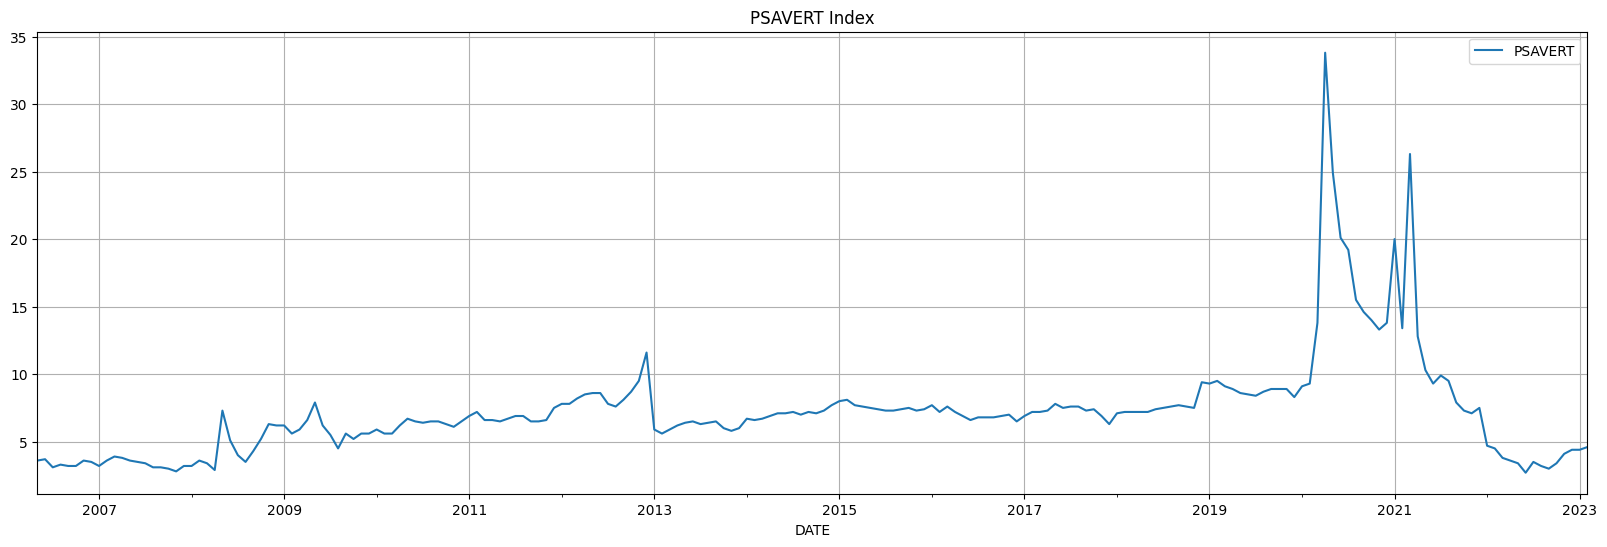

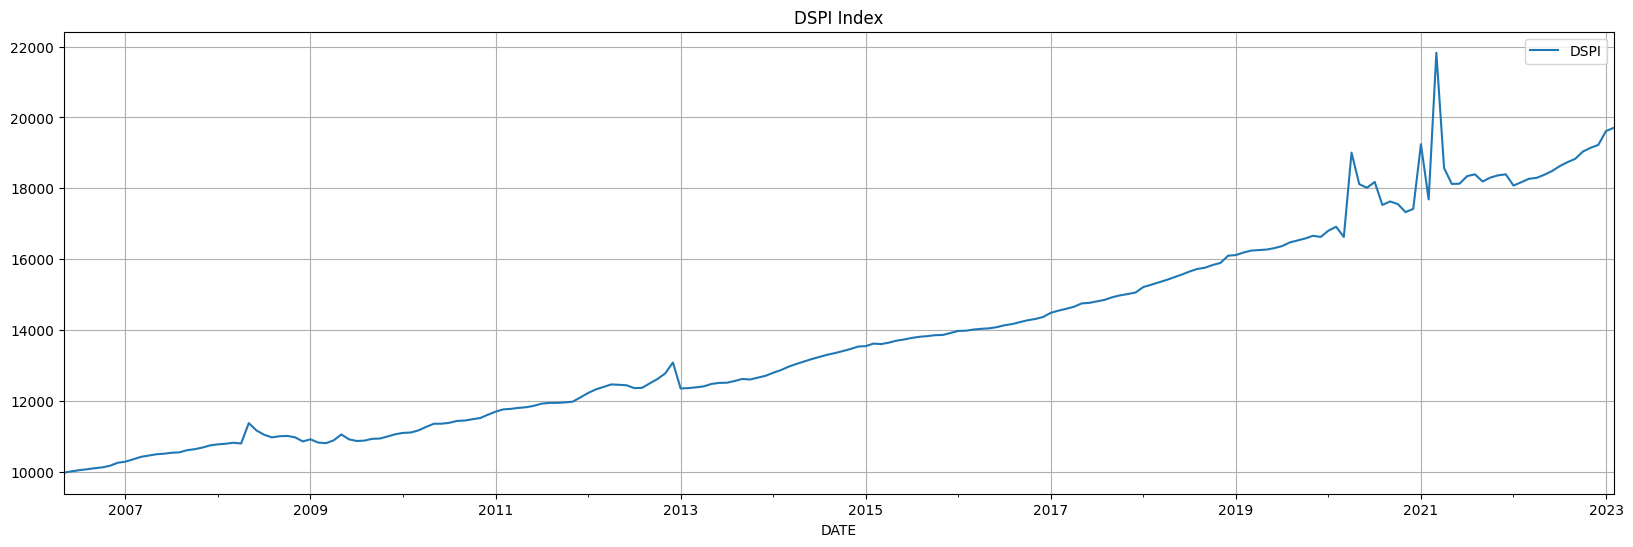

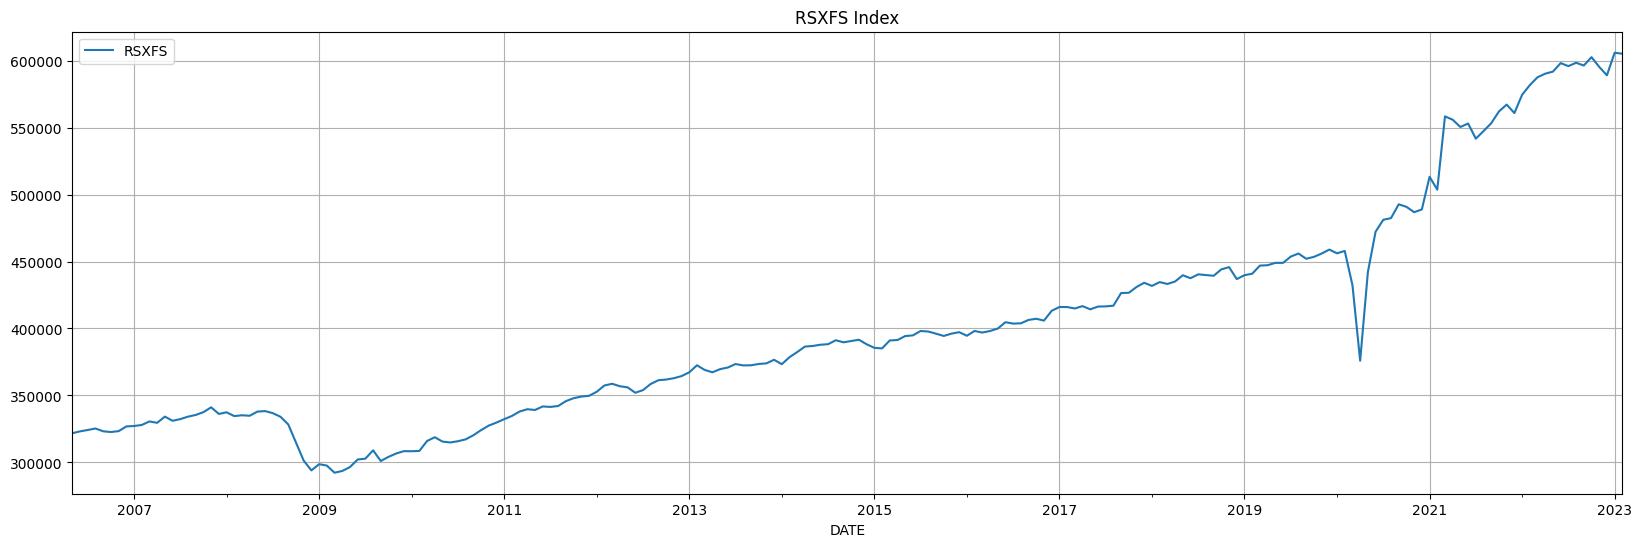

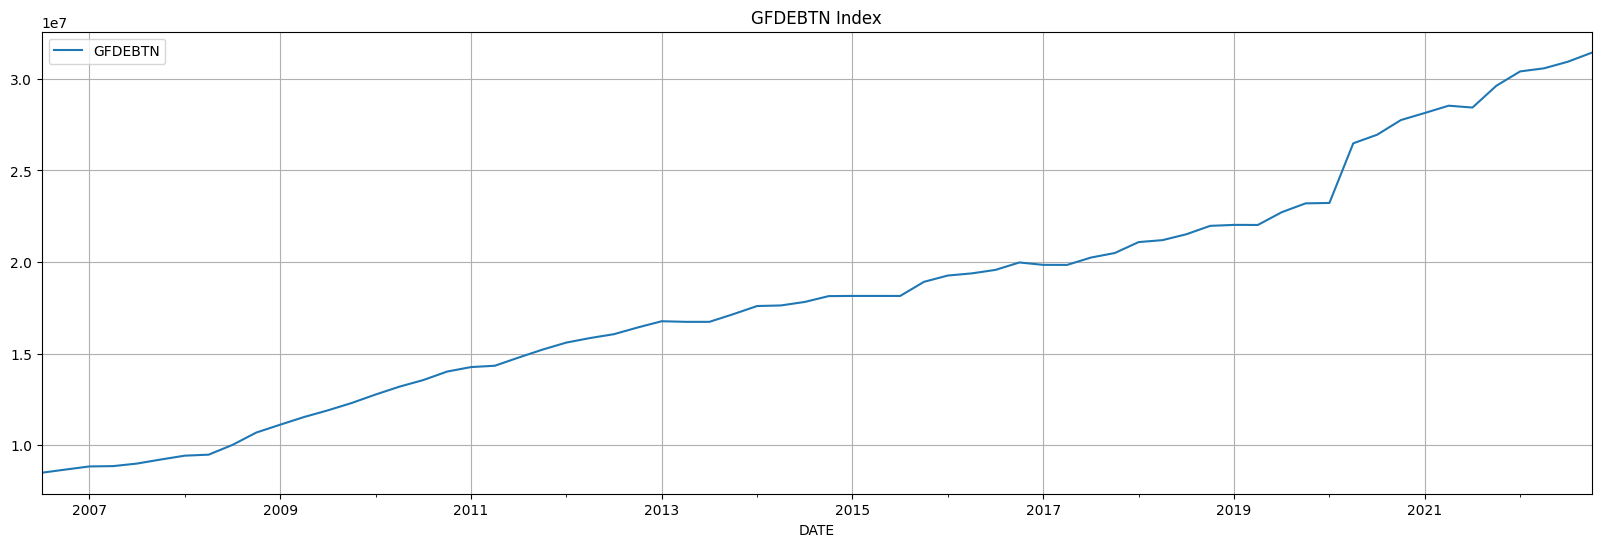

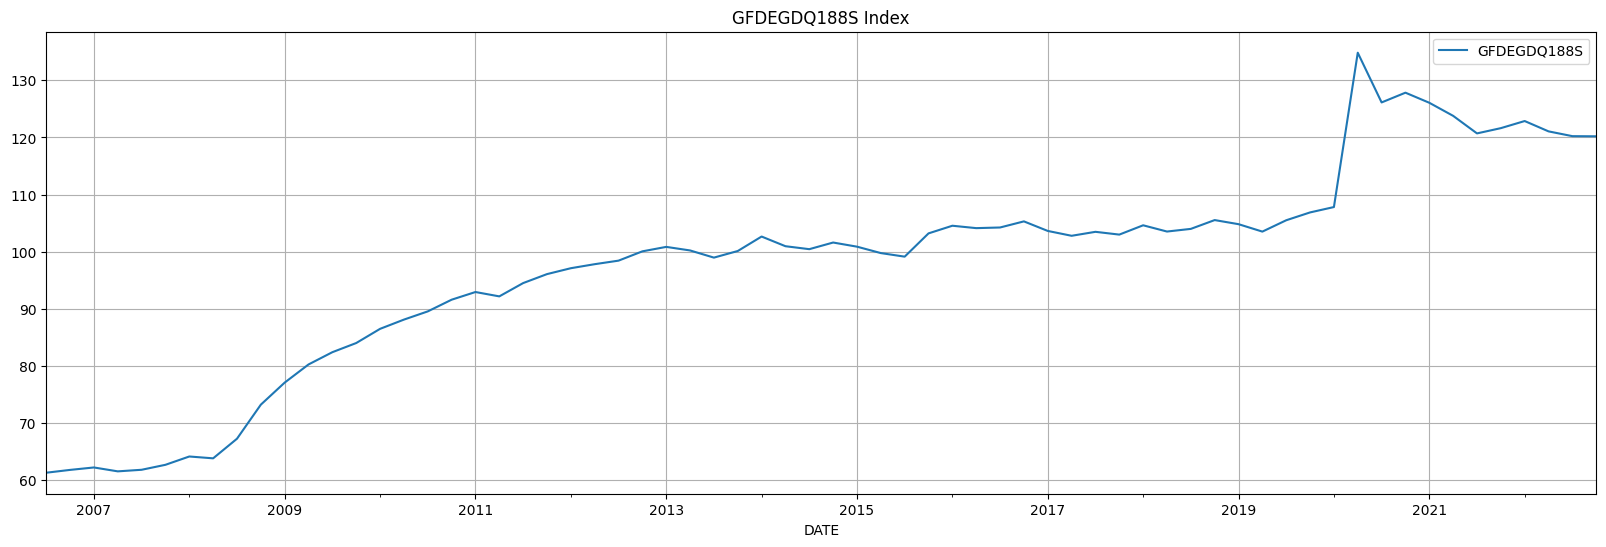

In [144]:
for indicator in index_fred:
  macro_indicators[indicator].plot.line(figsize=(20,6), grid = True, title=f'{indicator} Index')
  # df = macro_indicators[indicator][indicator]
  # df.index = pd.to_datetime(df.index)
